## Introduction

The purpose of this research notebook is to create a machine learning model using “Company_House_Info” data that helps to predict the company’s success or bankruptcy based on the following attributes:

Y - Bankrupt?: Class label

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability


### Importing the required libraries

We’ll start with importing the required libraries.
- Pandas for data analysis.
- NumPy for numerical operations.
- Matplotlib/seaborn for plotting or data visualization.
- Scikit-Learn for machine learning modelling and evaluation

In [1]:
# EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay

/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading data and Basic Information

In [3]:
df = pd.read_csv("Company_House_Info (1).csv") # 'DataFrame' shortened to 'df'
df.shape 

(6665, 96)

In [4]:
df.columns #returns column names

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [5]:
pd.set_option("display.max.columns", 100) #This is to ensure all columns are visibly printed out

df.head() #This shows the first five rows of the dataframe

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256970e-04   
1                               0.781506             2.897850e-04   
2                               0.780284             2.361300e-04   
3                               0.781241             1.078890e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [6]:
df.info() 
#This shows basic information about each variable, its data type as well as number as 
#available non-null data points in each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6665 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6665 non-null   float64
 2    ROA(A) before interest and % after tax                   6665 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6665 non-null   float64
 4    Operating Gross Margin                                   6665 non-null   float64
 5    Realized Sales Gross Margin                              6665 non-null   float64
 6    Operating Profit Rate                                    6665 non-null   float64
 7    Pre-tax net Interest Rate                                6665 non-null   float64
 8    After-tax net Int

### Basic Observations:
- Dataset consists of 6665 rows and 96 columns
- The dataset has numeric variables only made of floats and integers
- There appears to be no missing data point in each variable (to be confirmed during data cleaning)

## TASK 2: Data analysis and opportunity identification
QUESTION: In your report, conduct a detailed analysis of the given data, highlighting key patterns, trends, and opportunities. Focus on the relationships between variables and any significant correlations that could influence decision-making. Discuss similar problems from industry or research, outlining the techniques used to solve them. Compare the current scenario with analogous case studies, examining methods like regression, clustering, classification, or neural networks.


### Understanding the target variable
First, we see the distribution of the target variable 

In [7]:
# Let's see the distribution of smaples on our target variable "Bankrupt?"
df["Bankrupt?"].value_counts()

Bankrupt?
0    6446
1     219
Name: count, dtype: int64

In [8]:
# What is the distribution of bankrupcy in percent
percent = df["Bankrupt?"].value_counts(normalize=True)*100
percent

Bankrupt?
0    96.714179
1     3.285821
Name: proportion, dtype: float64

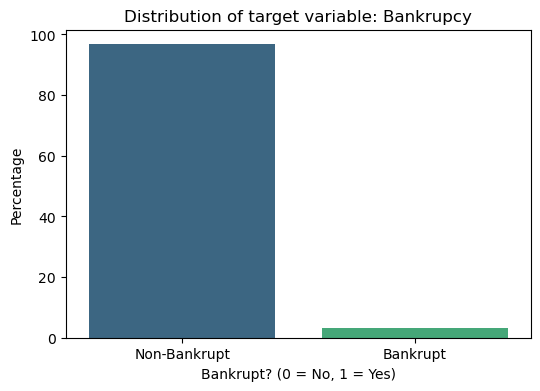

In [9]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=percent.index, y=percent.values, palette="viridis")
plt.title("Distribution of target variable: Bankrupcy")
plt.xlabel("Bankrupt? (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.xticks([0, 1], labels=["Non-Bankrupt", "Bankrupt"])
plt.show()

This shows that the dataframe is highly **imbalanced, that is, approximately 97% of observations (6446 out of 6665) are records of Non-bankrupt cases.**

This could lead to a training bias in model training where the model learns extensively about non-bankrupt cases and begins to generalize based on this. To manage this a balancing method will be introduced during model training.   

Next we look at the 
- Distribution of each variable 
- Variables relationship with each other as well as with the target variable, bankrupcy

In [10]:
df.describe() #shows descriptive statistics of each numeric variable

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6665.000000                                        6665.000000          
mean      0.032858                                           0.505001          
std       0.178279                                           0.060784          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476381          
50%       0.000000                                           0.502511          
75%       0.000000                                           0.535270          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6665.000000   
mean                                  0.558380   
std                                   0.065801   
min                                   0.000000   
25%                                   0.535379   
50%                                   0.559693   
75%                                   0.588803   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6665.000000    
mean                                            0.553428    
std                                             0.061707    
min                                             0.000000    
25%                                             0.527170    
50%                                             0.552171    
75%                                             0.583971    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6665.000000                   6665.000000   
mean                  0.607878                      0.607865   
std                   0.017031                      0.017016   
min                   0.000000                      0.000000   
25%                   0.600383                      0.600376   
50%                   0.605918                      0.605897   
75%                   0.613738                      0.613694   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6665.000000                 6665.000000   
mean                 0.998749                    0.797182   
std                  0.013159                    0.013017   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797462   
75%                  0.999094                    0.797578   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6665.000000   
mean                       0.809075   
std                        0.013757   
min                        0.000000   
25%                        0.809311   
50%                        0.809375   
75%                        0.809468   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6665.000000   
mean                                       0.303622   
std                                        0.011291   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303584   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6665.000000             6.665000e+03   
mean                                0.781374             2.009611e+09   
std                                 0.012824             3.245175e+09   
min                 

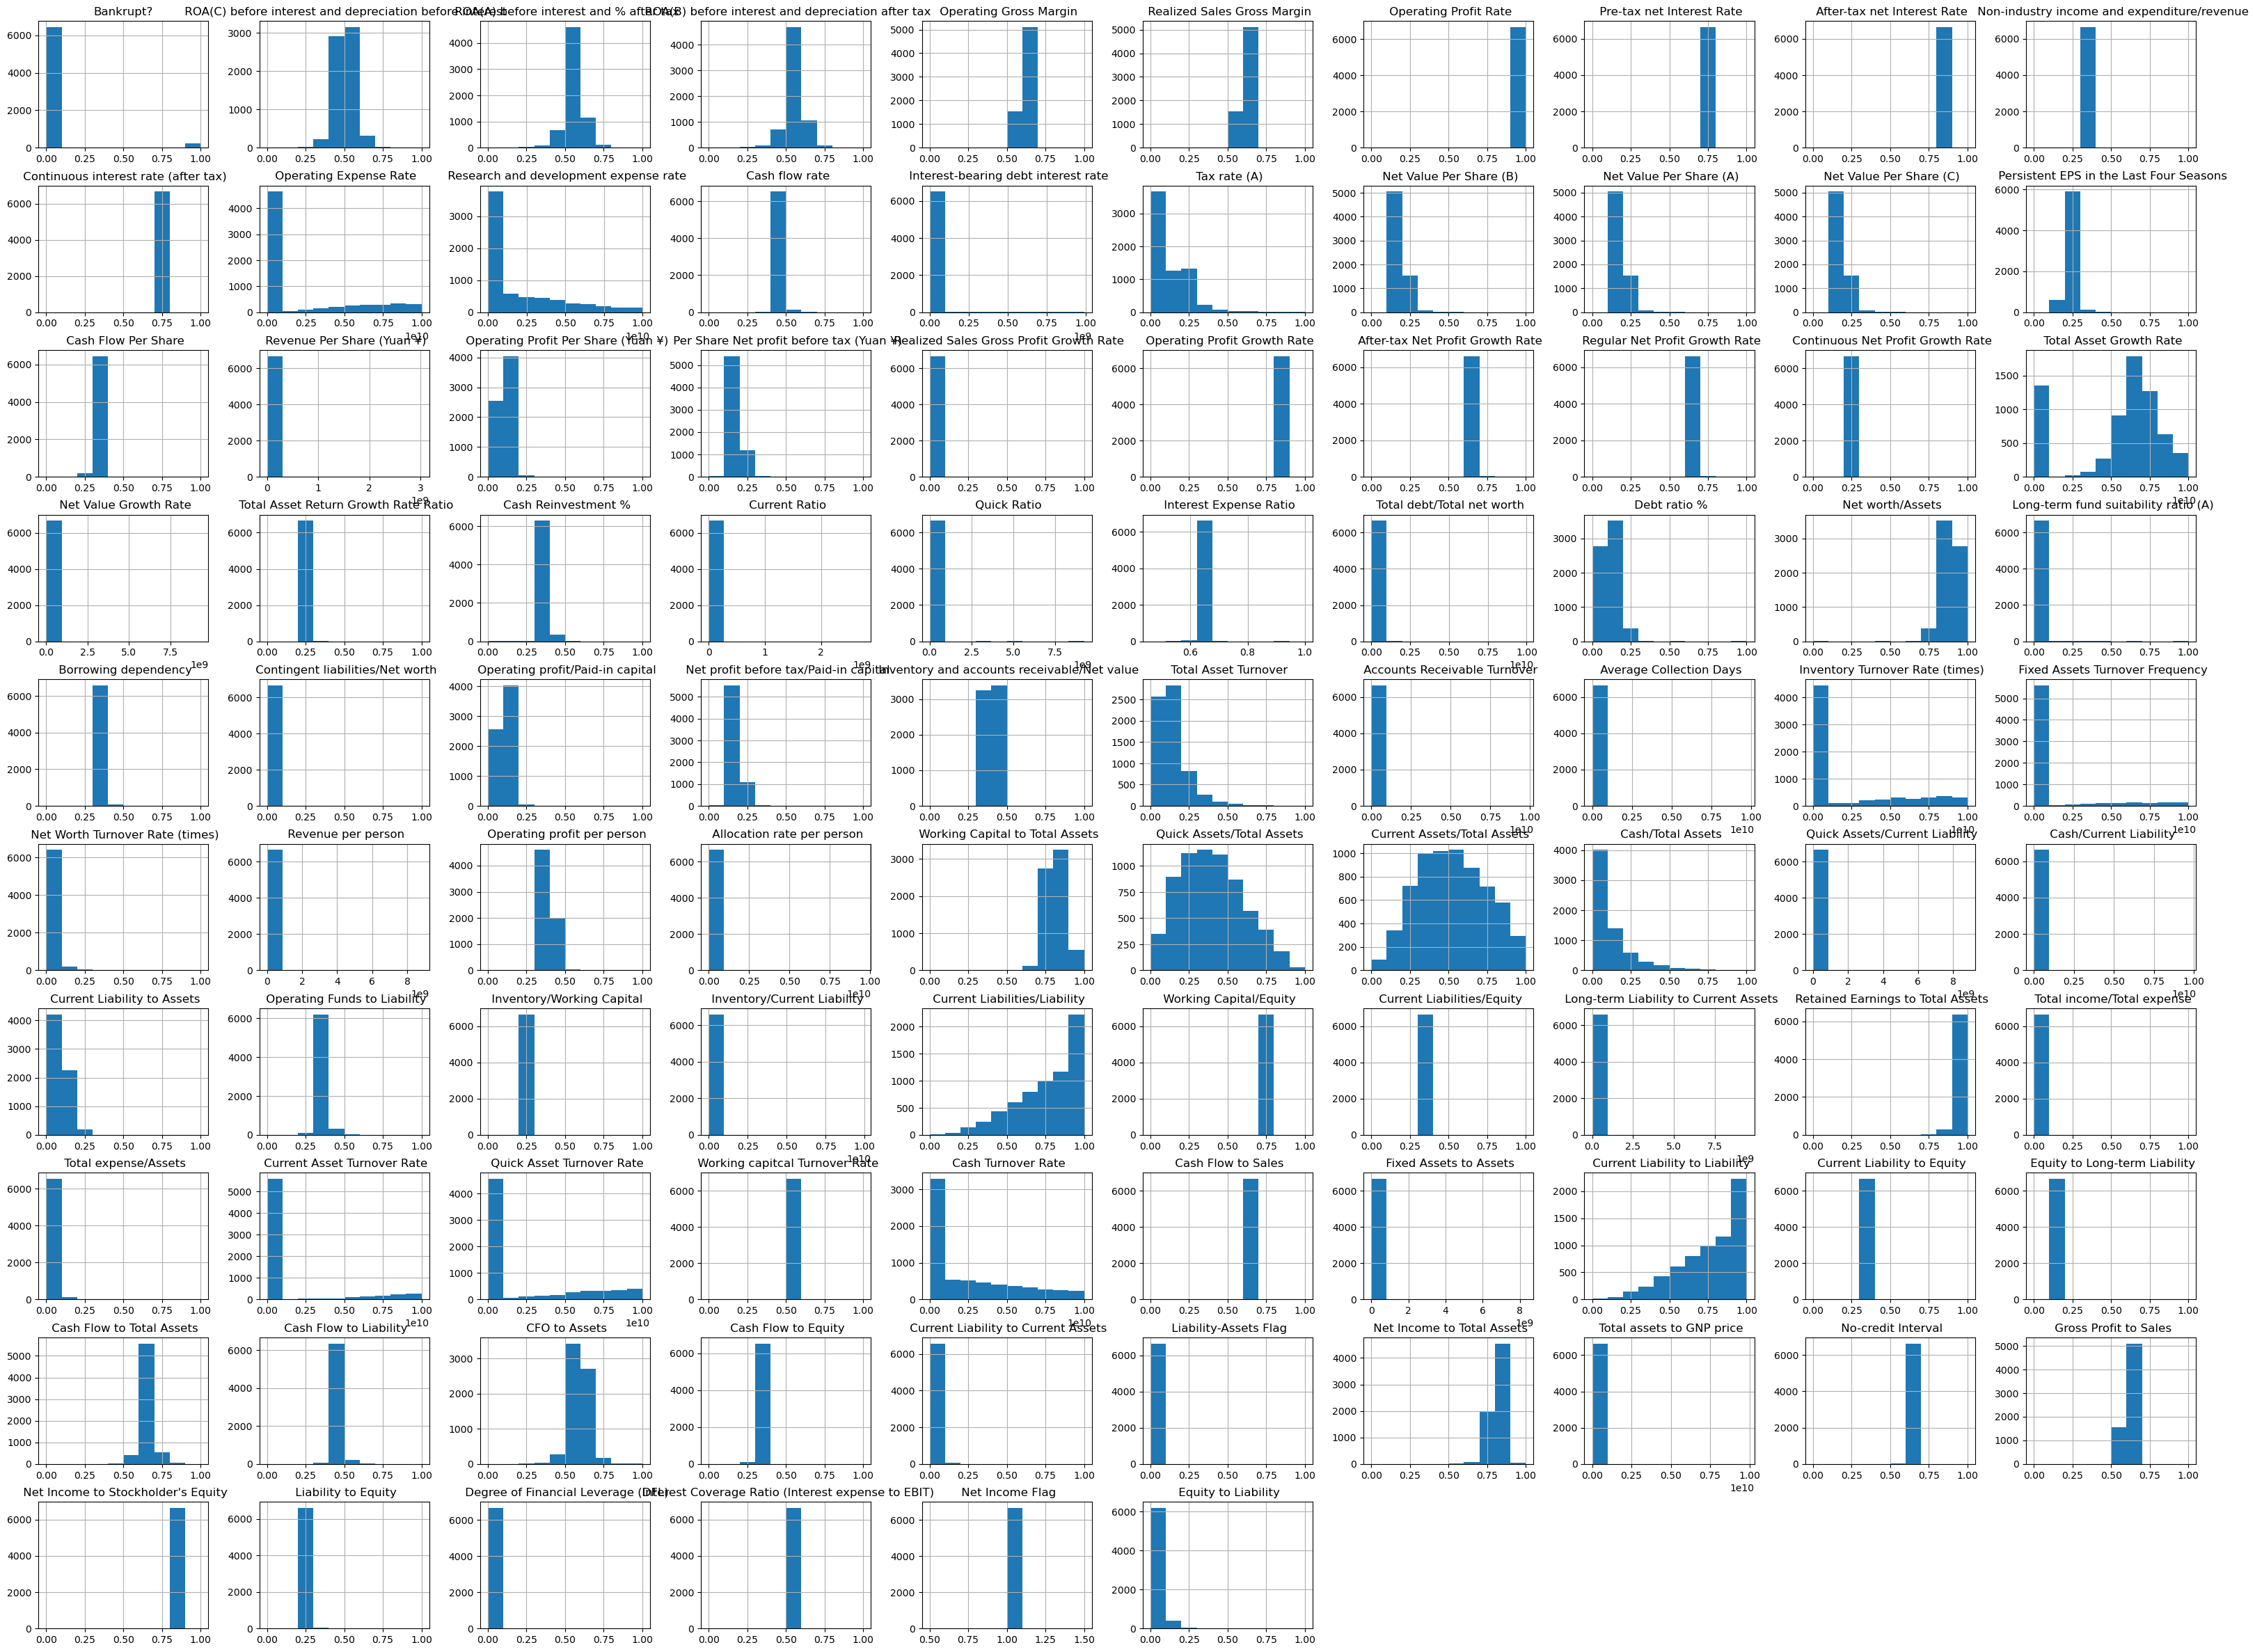

In [11]:
df.hist(figsize=(40,30)) #Histogram visulaizes distribution of data points in numeric features
plt.show()

Most observations have values between 0 and 1 while observations like 'Operating Expense Rate' consist of very large distribution, attention to normalize this will be given during the preprocessing phase for model training

Correlation analysis will be performed to help us
- Determine whether variables have relationship as well as the direction of this relationship(postive, negative or neural)
- Point us towards variables that are highly correlated, this may indicate redundancy, helping us decide which features to include or exclude in feature engineering
- Guide us towards variables that might be good predictors of the target variable bankruptcy.


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr".


**Correlation of all variables**

In [12]:
corr = df.corr()
corr

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.263337   
 ROA(A) before interest and % after tax             -0.285273   
 ROA(B) before interest and depreciation after tax  -0.275644   
 Operating Gross Margin                             -0.100623   
...                                                       ...   
 Liability to Equity                                 0.166875   
 Degree of Financial Leverage (DFL)                  0.010367   
 Interest Coverage Ratio (Interest expense to E...  -0.005149   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083396   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.263337          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.939815          
 ROA(B) before interest and depreciation after tax                                           0.986776          
 Operating Gross Margin                                                                      0.333295          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143616          
 Degree of Financial Leverage (DFL)                                                         -0.016612          
 Interest Coverage Ratio (Interest expense to E...                                           0.011924          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.051229          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.285273   
 ROA(C) before interest and depreciation before...                                 0.939815   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955557   
 Operating Gross Margin                                                            0.325623   
...                                                                                     ...   
 Liability to Equity                                                              -0.140793   
 Degree of Financial Leverage (DFL)                                               -0.011466   
 Interest Coverage Ratio (Interest expense to E...                                 0.014779   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.056683   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.275644    
 ROA(C) before interest and depreciation before...                                           0.986776    
 ROA(A) before interest and % after tax                                                      0.955557    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.332443    
...                                                                                               ...    
 Liability to Equity                       

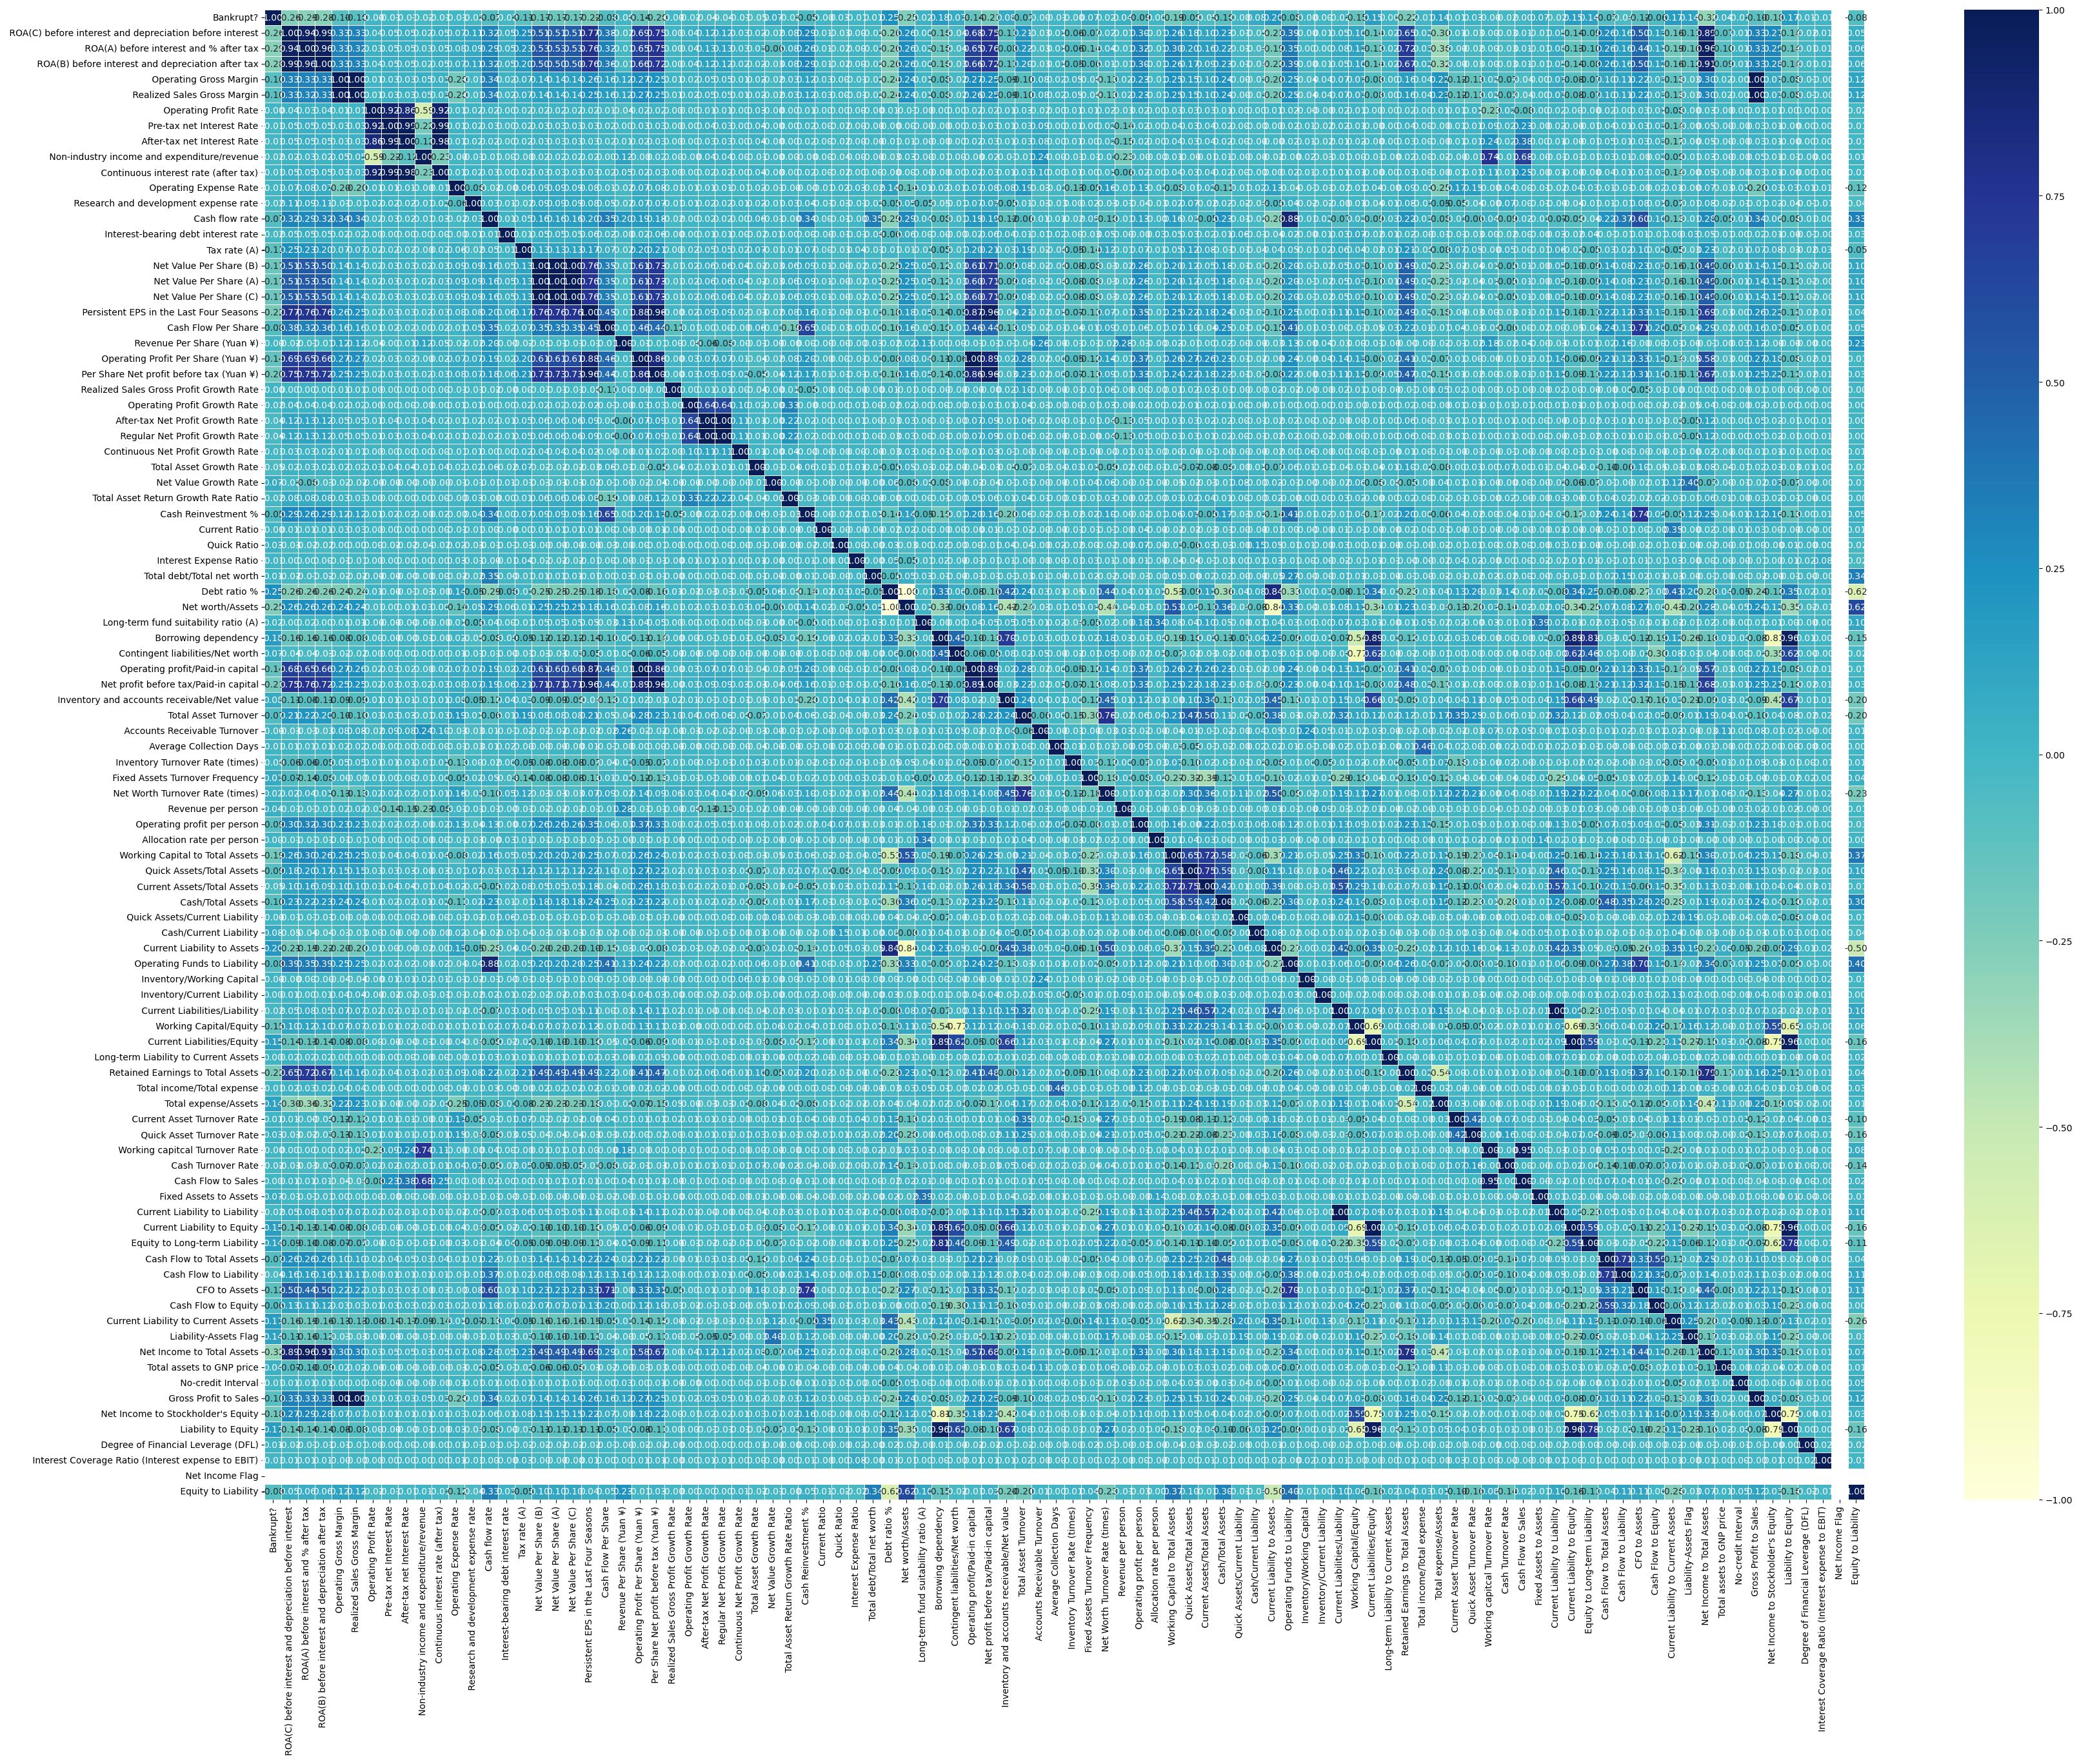

In [13]:
#VIsualizing the correlation
plt.figure(figsize=(40, 30))
sns.heatmap(corr, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.show()

Because this is difficult to see due to the number of variables, we zoom into variables with correlation greater than 0.5 and less than -0.5 only

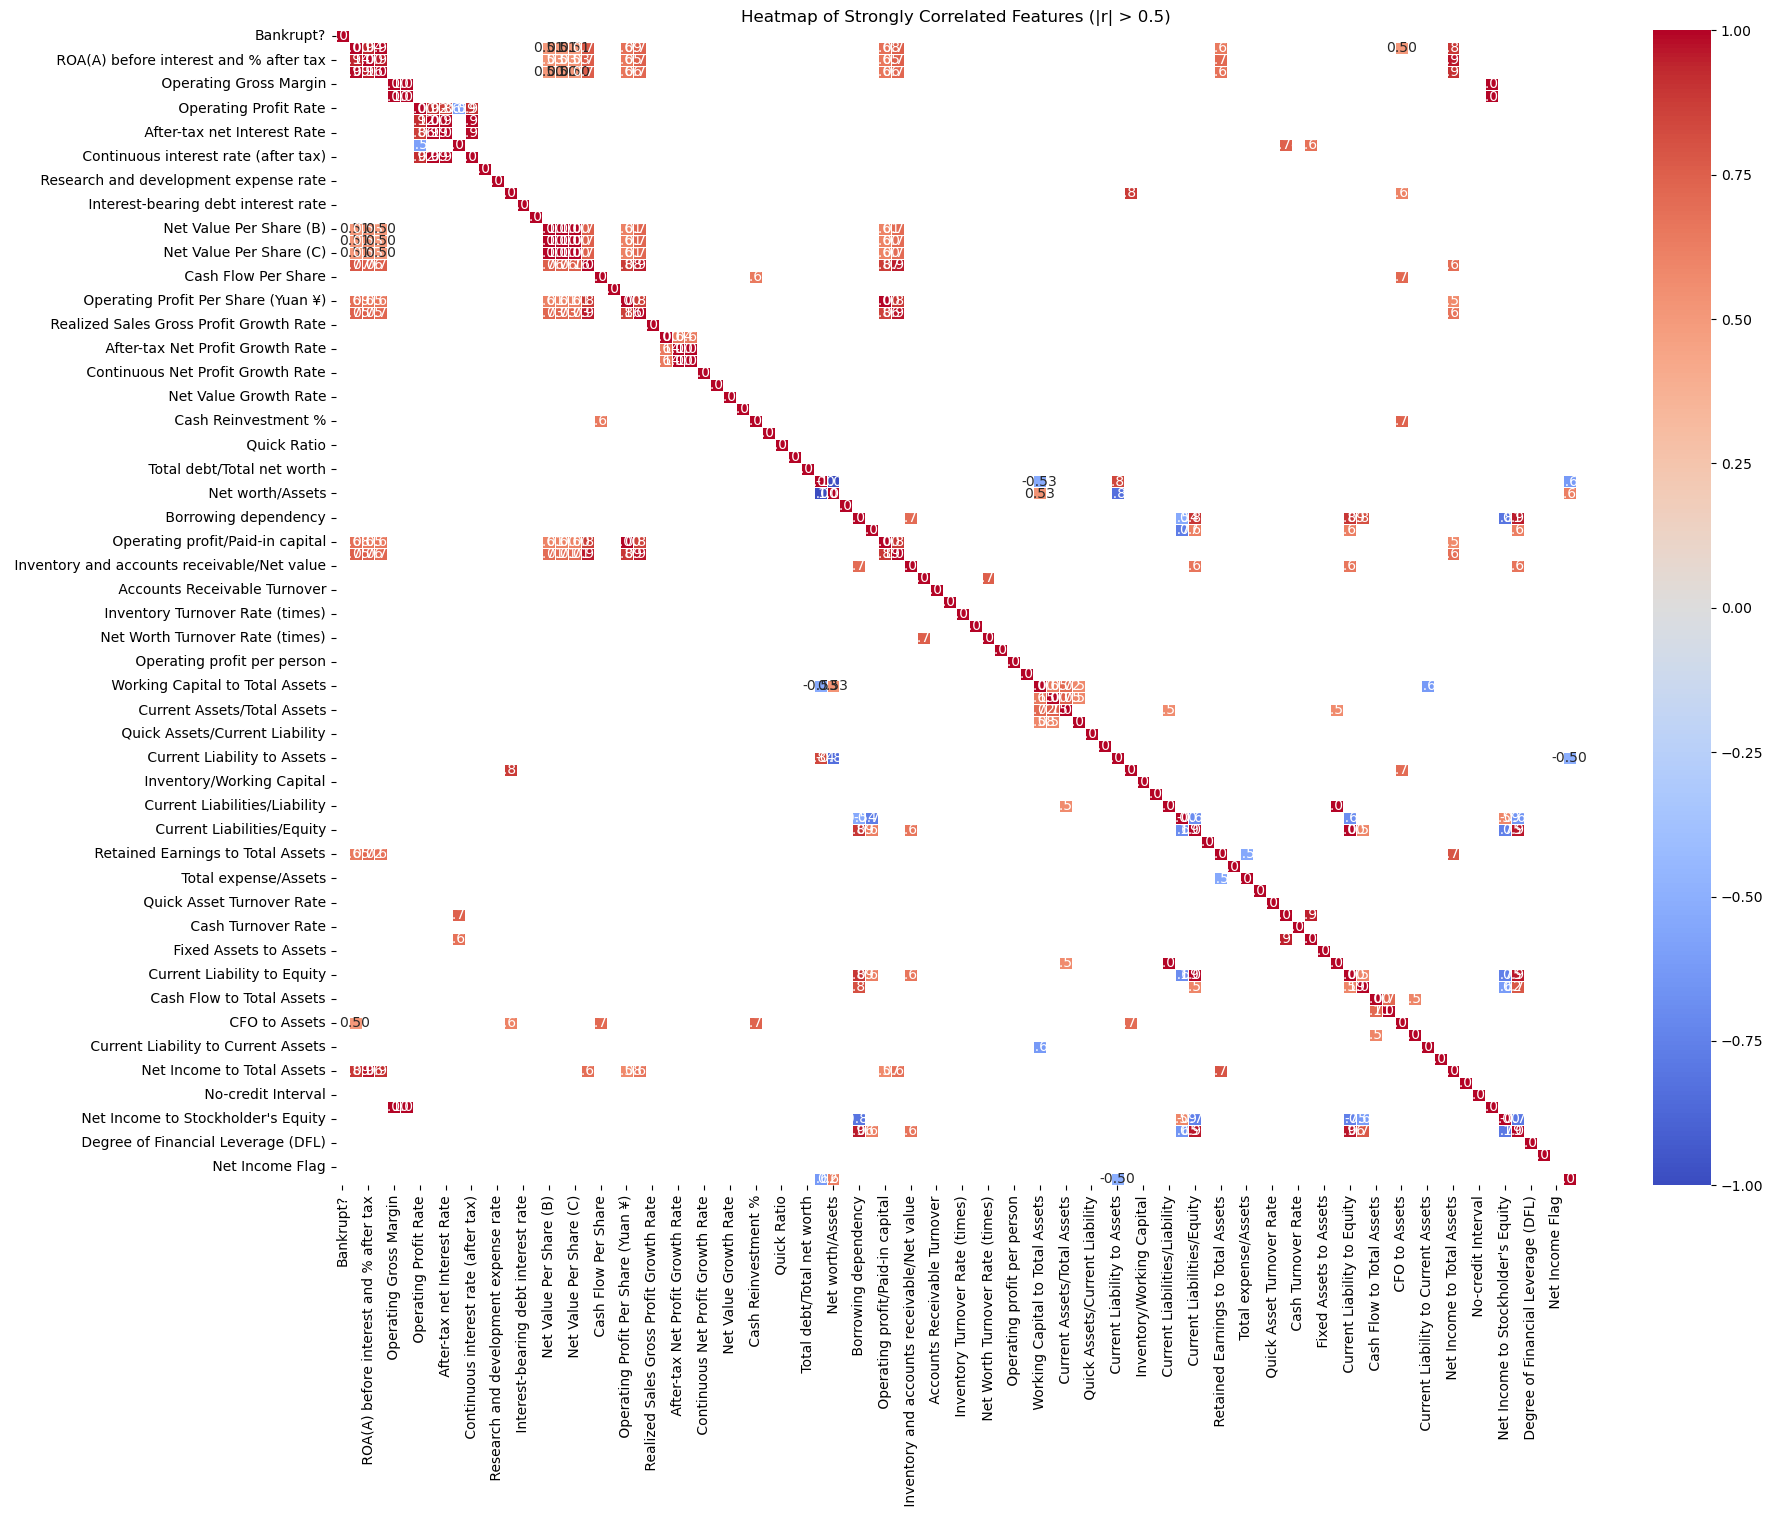

In [14]:
corr = df.corr()

# Filter for correlations > 0.5 or < -0.5
filtered_corr = corr.where((corr > 0.5) | (corr < -0.5))

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", cbar=True, vmin=-1, vmax=1)

# Title and labels
plt.title("Heatmap of Strongly Correlated Features (|r| > 0.5)")
plt.show()


In [15]:


# Define the threshold for filtering correlations
threshold = 0.5

# Filter for correlations > 0.5 or < -0.5
filtered_corr = corr.where((corr > threshold) | (corr < -threshold))

# Extract the pairs of correlated columns and their correlation values
correlated_pairs = (
    filtered_corr
    .stack()  # Convert to a Series with MultiIndex
    .reset_index()  # Convert to DataFrame
)

# Rename the columns for readability
correlated_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

# Drop self-correlations (where Feature_1 == Feature_2)
correlated_pairs = correlated_pairs[correlated_pairs["Feature_1"] != correlated_pairs["Feature_2"]]

# Drop duplicate pairs (e.g., (A, B) and (B, A))
correlated_pairs = correlated_pairs.drop_duplicates(subset=["Correlation"])

# Sort by the absolute value of the correlation
correlated_pairs = correlated_pairs.sort_values(by="Correlation", ascending=False)

print(correlated_pairs)


                               Feature_1                            Feature_2  \
265        Current Liabilities/Liability       Current Liability to Liability   
43                Operating Gross Margin                Gross Profit to Sales   
91               Net Value Per Share (A)              Net Value Per Share (C)   
42                Operating Gross Margin          Realized Sales Gross Margin   
46           Realized Sales Gross Margin                Gross Profit to Sales   
..                                   ...                                  ...   
189     Contingent liabilities/Net worth               Working Capital/Equity   
357   Net Income to Stockholder's Equity                  Liability to Equity   
186                 Borrowing dependency   Net Income to Stockholder's Equity   
177                     Net worth/Assets          Current Liability to Assets   
170                         Debt ratio %                     Net worth/Assets   

     Correlation  
265     

In [16]:
# Convert correlated pairs to a DataFrame
correlated_df = pd.DataFrame(correlated_pairs)
correlated_df.head(20)


Feature_1  \
265                      Current Liabilities/Liability   
43                              Operating Gross Margin   
91                             Net Value Per Share (A)   
42                              Operating Gross Margin   
46                         Realized Sales Gross Margin   
79                             Net Value Per Share (B)   
80                             Net Value Per Share (B)   
133                Operating Profit Per Share (Yuan ¥)   
154                   After-tax Net Profit Growth Rate   
55                           Pre-tax net Interest Rate   
3     ROA(C) before interest and depreciation befor...   
54                           Pre-tax net Interest Rate   
59                         After-tax net Interest Rate   
281                         Current Liabilities/Equity   
146           Per Share Net profit before tax (Yuan ¥)   
27              ROA(A) before interest and % after tax   
118            Persistent EPS in the Last Four Seasons   
187                               Borrowing dependency   
17              ROA(A) before interest and % after tax   
116            Persistent EPS in the Last Four Seasons   

                                             Feature_2  Correlation  
265                     Current Liability to Liability     1.000000  
43                               Gross Profit to Sales     1.000000  
91                             Net Value Per Share (C)     0.999833  
42                         Realized Sales Gross Margin     0.999607  
46                               Gross Profit to Sales     0.999607  
79                             Net Value Per Share (A)     0.999344  
80                             Net Value Per Share (C)     0.999176  
133                   Operating profit/Paid-in capital     0.998680  
154                     Regular Net Profit Growth Rate     0.996183  
55                Continuous interest rate (after tax)     0.993616  
3     ROA(B) before interest and depreciation after...     0.986776  
54                         After-tax net Interest Rate     0.986379  
59                Continuous interest rate (after tax)     0.984452  
281                                Liability to Equity     0.963958  
146              Net profit before tax/Paid-in capital     0.962148  
27                          Net Income to Total Assets     0.961180  
118              Net profit before tax/Paid-in capital     0.958894  
187                                Liability to Equity     0.956139  
17    ROA(B) before interest and depreciation after...     0.955557  
116           Per Share Net profit before tax (Yuan ¥)     0.955014

In [18]:
df.rename(columns={c: c.strip() for c in df.columns}, inplace=True)

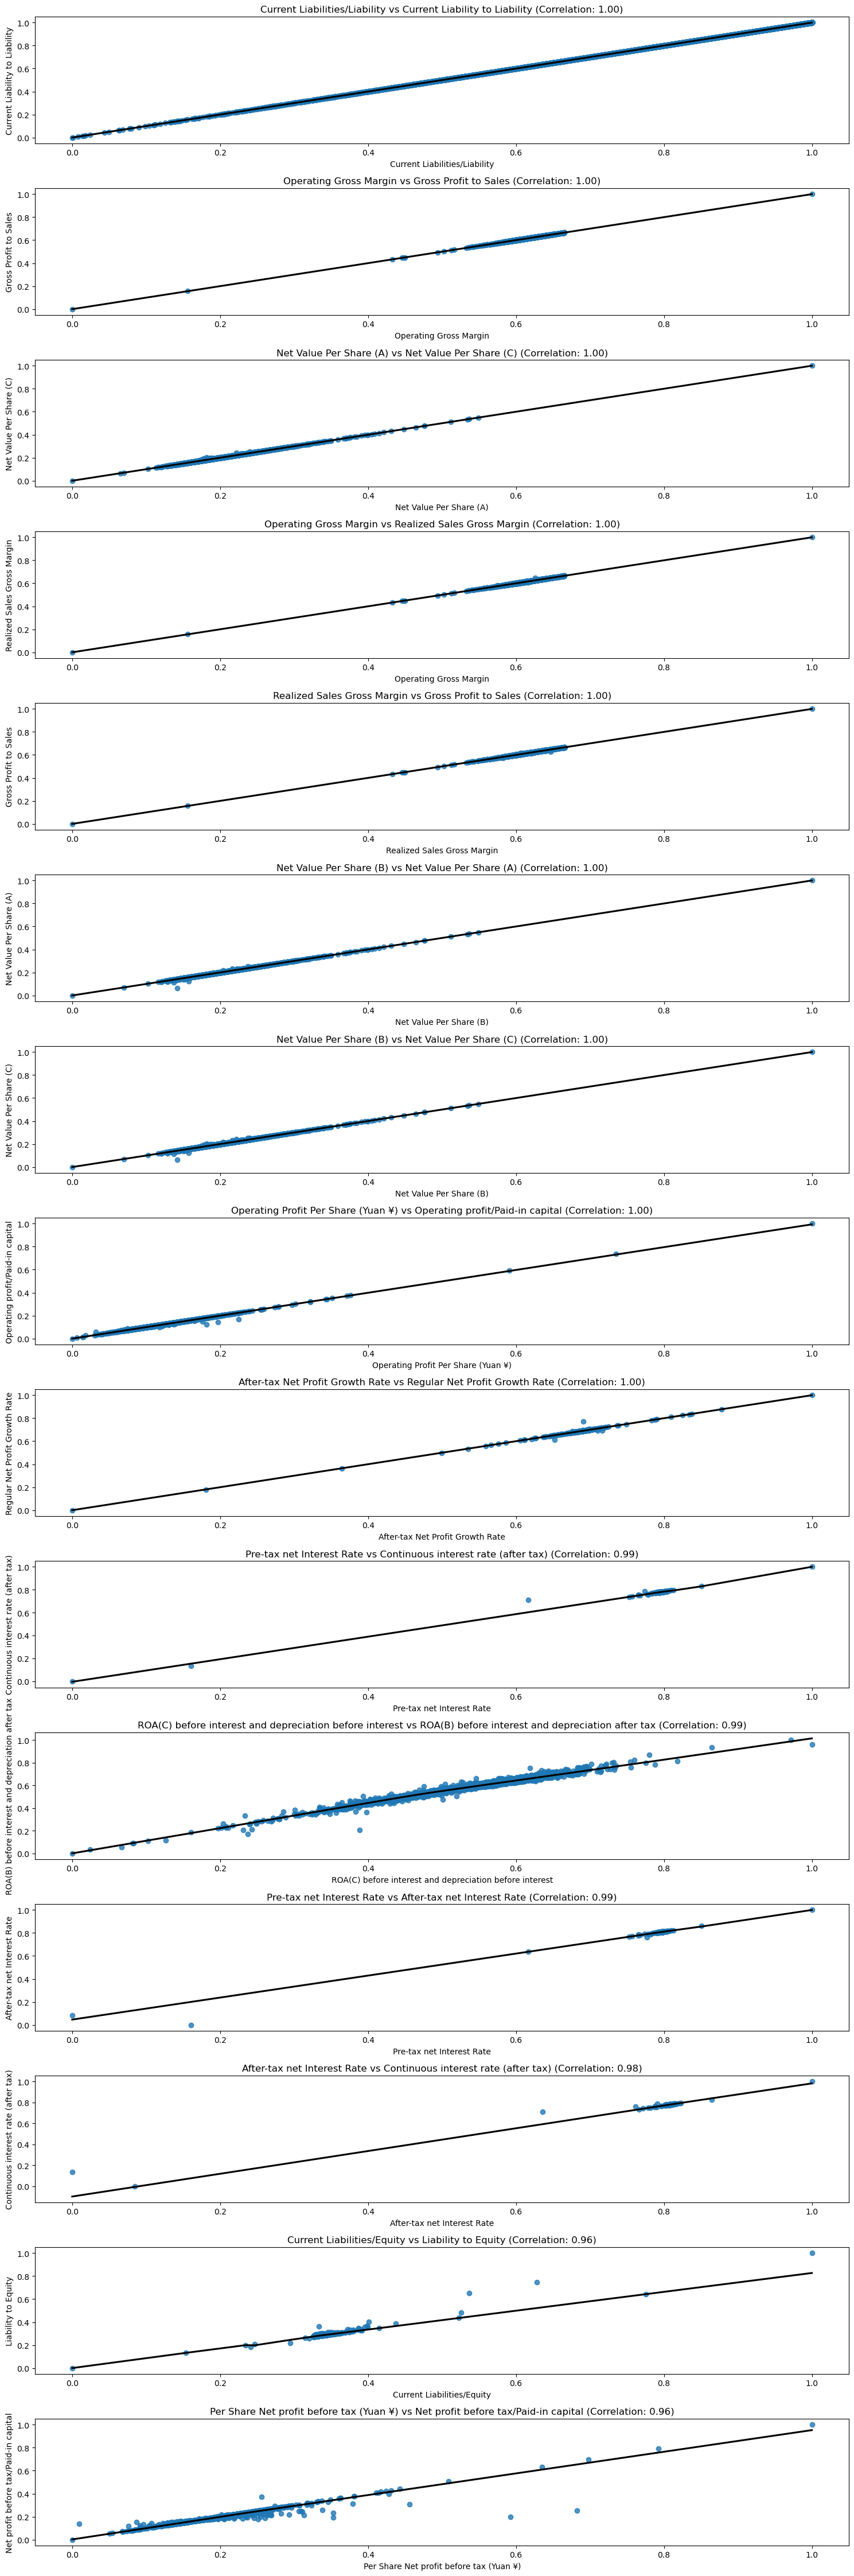

In [19]:

# Number of correlated pairs to visualize
num_pairs = 15

# Plot regression plots for the top correlated pairs
plt.figure(figsize=(15, num_pairs * 3))  # Adjust figure size for readability

for i, row in enumerate(correlated_df.head(num_pairs).itertuples(), 1):
    feature_1 = row.Feature_1.strip()
    feature_2 = row.Feature_2.strip()
    correlation = row.Correlation
    
    # Subplot for each pair
    plt.subplot(num_pairs, 1, i)
    sns.regplot(
        data=df,
        x=feature_1,
        y=feature_2,
        line_kws={'color': 'black'},  # Regression line color
        lowess=True
    )
    plt.title(f"{feature_1} vs {feature_2} (Correlation: {correlation:.2f})")
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.tight_layout()

plt.show()


---

### **1. Current Liabilities/Liability & Current Liability to Liability (1.0)**
- **Explanation**: Both ratios essentially measure the same thing: the proportion of current liabilities to total liabilities. A perfect correlation (1.0) is expected because these features are likely calculated using the same underlying values.
- **Industry Context**: These ratios indicate the company's short-term financial obligations relative to its total liabilities, important for liquidity assessments.

---

### **2. Operating Gross Margin & Gross Profit to Sales (0.99999999)**
- **Explanation**: Operating gross margin and gross profit to sales are closely related because both metrics evaluate profitability at different stages of operations. Gross profit to sales is often a direct component of calculating the operating gross margin.
- **Industry Context**: These metrics measure operational efficiency and profitability. High correlation is expected as they track similar trends in revenue and costs.

---

### **3. Net Value Per Share (A) & Net Value Per Share (C) (0.9998)**
- **Explanation**: Variants of net value per share often represent similar financial metrics calculated with slightly different formulas or assumptions. The high correlation suggests that the differences in these calculations are minimal.
- **Industry Context**: These metrics indicate the equity value allocated to each share, often used by investors to evaluate a company's financial health.

---

### **4. Operating Gross Margin & Realized Sales Gross Margin (0.9996)**
- **Explanation**: Realized sales gross margin is a subset of operating gross margin, focusing specifically on gross profit from sales activities. The close relationship arises because both share the same revenue and cost structure inputs.
- **Industry Context**: Both metrics evaluate profitability, with realized sales gross margin providing more granular insights into sales performance.

---

### **5. Realized Sales Gross Margin & Gross Profit to Sales (0.9996)**
- **Explanation**: Gross profit to sales directly feeds into realized sales gross margin. Both metrics focus on profitability, with gross profit to sales being a more straightforward calculation.
- **Industry Context**: Both are critical for assessing sales efficiency and the ability to manage costs associated with generating revenue.

---

### **6. Net Value Per Share (B) & Net Value Per Share (A) (0.9993)**
- **Explanation**: Similar to the relationship between Net Value Per Share (A) and (C), the high correlation reflects the fact that these metrics are calculated using nearly identical inputs, with minor adjustments for accounting policies.
- **Industry Context**: These are fundamental indicators of shareholder equity per share and are often interchangeable in analysis.

---

### **7. Net Value Per Share (B) & Net Value Per Share (C) (0.9992)**
- **Explanation**: These metrics are almost identical in concept and calculation. Variations between them likely stem from adjustments specific to financial reporting frameworks or regions.
- **Industry Context**: The high correlation suggests that differences in valuation methods have minimal impact on these metrics' overall trends.

---

### **8. Operating Profit Per Share (Yuan ¥) & Operating Profit/Paid-in Capital (0.9987)**
- **Explanation**: Operating profit per share is derived from dividing operating profit by the number of shares, while operating profit per paid-in capital uses paid-in capital as the denominator. Both metrics rely on operating profit as the numerator, leading to high correlation.
- **Industry Context**: These metrics assess profitability relative to different base measures, important for investors and financial analysts.

---

### **9. After-tax Net Profit Growth Rate & Regular Net Profit Growth Rate (0.9962)**
- **Explanation**: Both metrics evaluate net profit growth, with after-tax profit accounting for tax impacts. The high correlation indicates that tax variations do not significantly affect the net profit growth trend.
- **Industry Context**: Growth rates are used to track profitability trends over time. High correlation reflects consistent growth patterns before and after taxes.

---

### **10. Pre-tax Net Interest Rate & Continuous Interest Rate (After Tax) (0.9936)**
- **Explanation**: Pre-tax and after-tax interest rates are closely related, as the after-tax rate is derived from the pre-tax rate by applying a tax factor. The near-perfect correlation reflects this relationship.
- **Industry Context**: These metrics are used to evaluate the cost of debt financing. The after-tax rate provides a more realistic picture of the effective cost of borrowing.

---

### **11. ROA(C) Before Interest and Depreciation & ROA(B) Before Interest and Depreciation After Tax (0.9868)**
- **Explanation**: Both metrics measure Return on Assets (ROA), with slight differences in their accounting for depreciation and tax. The correlation indicates that these variations do not significantly alter the overall profitability trend.
- **Industry Context**: ROA is critical for evaluating how efficiently a company uses its assets to generate profits.

---

### **12. Pre-tax Net Interest Rate & After-tax Net Interest Rate (0.9864)**
- **Explanation**: Similar to the earlier example, the after-tax net interest rate is derived from the pre-tax rate. The correlation indicates that taxes do not heavily distort the trend.
- **Industry Context**: Both metrics are important for assessing debt costs and financial stability.

---

### **13. Current Liabilities/Equity & Liability to Equity (0.9640)**
- **Explanation**: Both metrics relate liabilities to equity, with slight differences in how current liabilities or total liabilities are used. The high correlation reflects the relationship between short-term and total liabilities.
- **Industry Context**: These ratios are used to evaluate leverage and financial risk.

---

### **14. Per Share Net Profit Before Tax (Yuan ¥) & Net Profit Before Tax/Paid-in Capital (0.9621)**
- **Explanation**: Both metrics involve net profit before tax as a numerator. The denominator differs (number of shares vs. paid-in capital), but trends in net profit dominate the correlation.
- **Industry Context**: These are profitability measures, critical for assessing financial performance.

---



There are several highly correlated features, which may require dimensionality reduction techniques like feature selection to avoid multicollinearity issues

**Correlation of variables with target variable**

In [20]:
# Correlation analysis between features and target variable
pd.set_option("display.max.rows", 100) #This is to ensure all rows are visibly printed out
correlation_with_target = df.corr()[['Bankrupt?']].sort_values("Bankrupt?", ascending=False)
correlation_with_target

Bankrupt?
Bankrupt?                                            1.000000
Debt ratio %                                         0.251531
Current Liability to Assets                          0.196135
Borrowing dependency                                 0.176349
Current Liability to Current Assets                  0.171621
Liability to Equity                                  0.166875
Current Liabilities/Equity                           0.153991
Current Liability to Equity                          0.153991
Total expense/Assets                                 0.139835
Liability-Assets Flag                                0.139458
Equity to Long-term Liability                        0.138830
Cash/Current Liability                               0.077882
Inventory and accounts receivable/Net value          0.075219
Fixed Assets Turnover Frequency                      0.073350
Contingent liabilities/Net worth                     0.070691
Fixed Assets to Assets                               0.066459
Net Value Growth Rate                                0.065452
Revenue per person                                   0.039764
Total assets to GNP price                            0.035029
Quick Asset Turnover Rate                            0.026423
Quick Ratio                                          0.025008
Net Worth Turnover Rate (times)                      0.021053
Long-term fund suitability ratio (A)                 0.016965
Total debt/Total net worth                           0.012257
Current Asset Turnover Rate                          0.012162
Degree of Financial Leverage (DFL)                   0.010367
Allocation rate per person                           0.002707
Long-term Liability to Current Assets                0.001834
Inventory/Current Liability                          0.000650
Cash Flow to Sales                                   0.000501
Operating Profit Rate                               -0.000160
Realized Sales Gross Profit Growth Rate             -0.000526
Inventory Turnover Rate (times)                     -0.000572
Inventory/Working Capital                           -0.001995
Current Ratio                                       -0.002258
Working capitcal Turnover Rate                      -0.002897
Quick Assets/Current Liability                      -0.003903
Revenue Per Share (Yuan ¥)                          -0.004791
Accounts Receivable Turnover                        -0.004922
Interest Coverage Ratio (Interest expense to EBIT)  -0.005149
No-credit Interval                                  -0.005616
Interest Expense Ratio                              -0.005913
Operating Expense Rate                              -0.006447
Average Collection Days                             -0.006702
Total income/Total expense                          -0.007182
Continuous interest rate (after tax)                -0.008326
Pre-tax net Interest Rate                           -0.008441
After-tax net Interest Rate                         -0.008787
Continuous Net Profit Growth Rate                   -0.009412
Operating Profit Growth Rate                        -0.015162
Non-industry income and expenditure/revenue         -0.016612
Total Asset Return Growth Rate Ratio                -0.016615
Cash Turnover Rate                                  -0.018253
Current Liability to Liability                      -0.020220
Current Liabilities/Liability                       -0.020220
Interest-bearing debt interest rate                 -0.022566
Research and development expense rate               -0.023237
Regular Net Profit Growth Rate                      -0.036709
After-tax Net Profit Growth Rate                    -0.037674
Cash Flow to Liability                              -0.043109
Current Assets/Total Assets                         -0.045043
Total Asset Growth Rate                             -0.045987
Cash Reinvestment %                                 -0.051785
Cash Flow to Equity                                 -0.058434
Total Asset Turnover  

In [21]:
# Heatmap of top correlations with the target variable
top_features = pd.concat([correlation_with_target.head(11), correlation_with_target.tail(11)], ignore_index=False)
top_features

Bankrupt?
Bankrupt?                                            1.000000
Debt ratio %                                         0.251531
Current Liability to Assets                          0.196135
Borrowing dependency                                 0.176349
Current Liability to Current Assets                  0.171621
Liability to Equity                                  0.166875
Current Liabilities/Equity                           0.153991
Current Liability to Equity                          0.153991
Total expense/Assets                                 0.139835
Liability-Assets Flag                                0.139458
Equity to Long-term Liability                        0.138830
Working Capital to Total Assets                     -0.194304
Per Share Net profit before tax (Yuan ¥)            -0.202625
Net profit before tax/Paid-in capital               -0.209152
Retained Earnings to Total Assets                   -0.219084
Persistent EPS in the Last Four Seasons             -0.221012
Net worth/Assets                                    -0.251531
ROA(C) before interest and depreciation before ...  -0.263337
ROA(B) before interest and depreciation after tax   -0.275644
ROA(A) before interest and % after tax              -0.285273
Net Income to Total Assets                          -0.317675
Net Income Flag                                           NaN

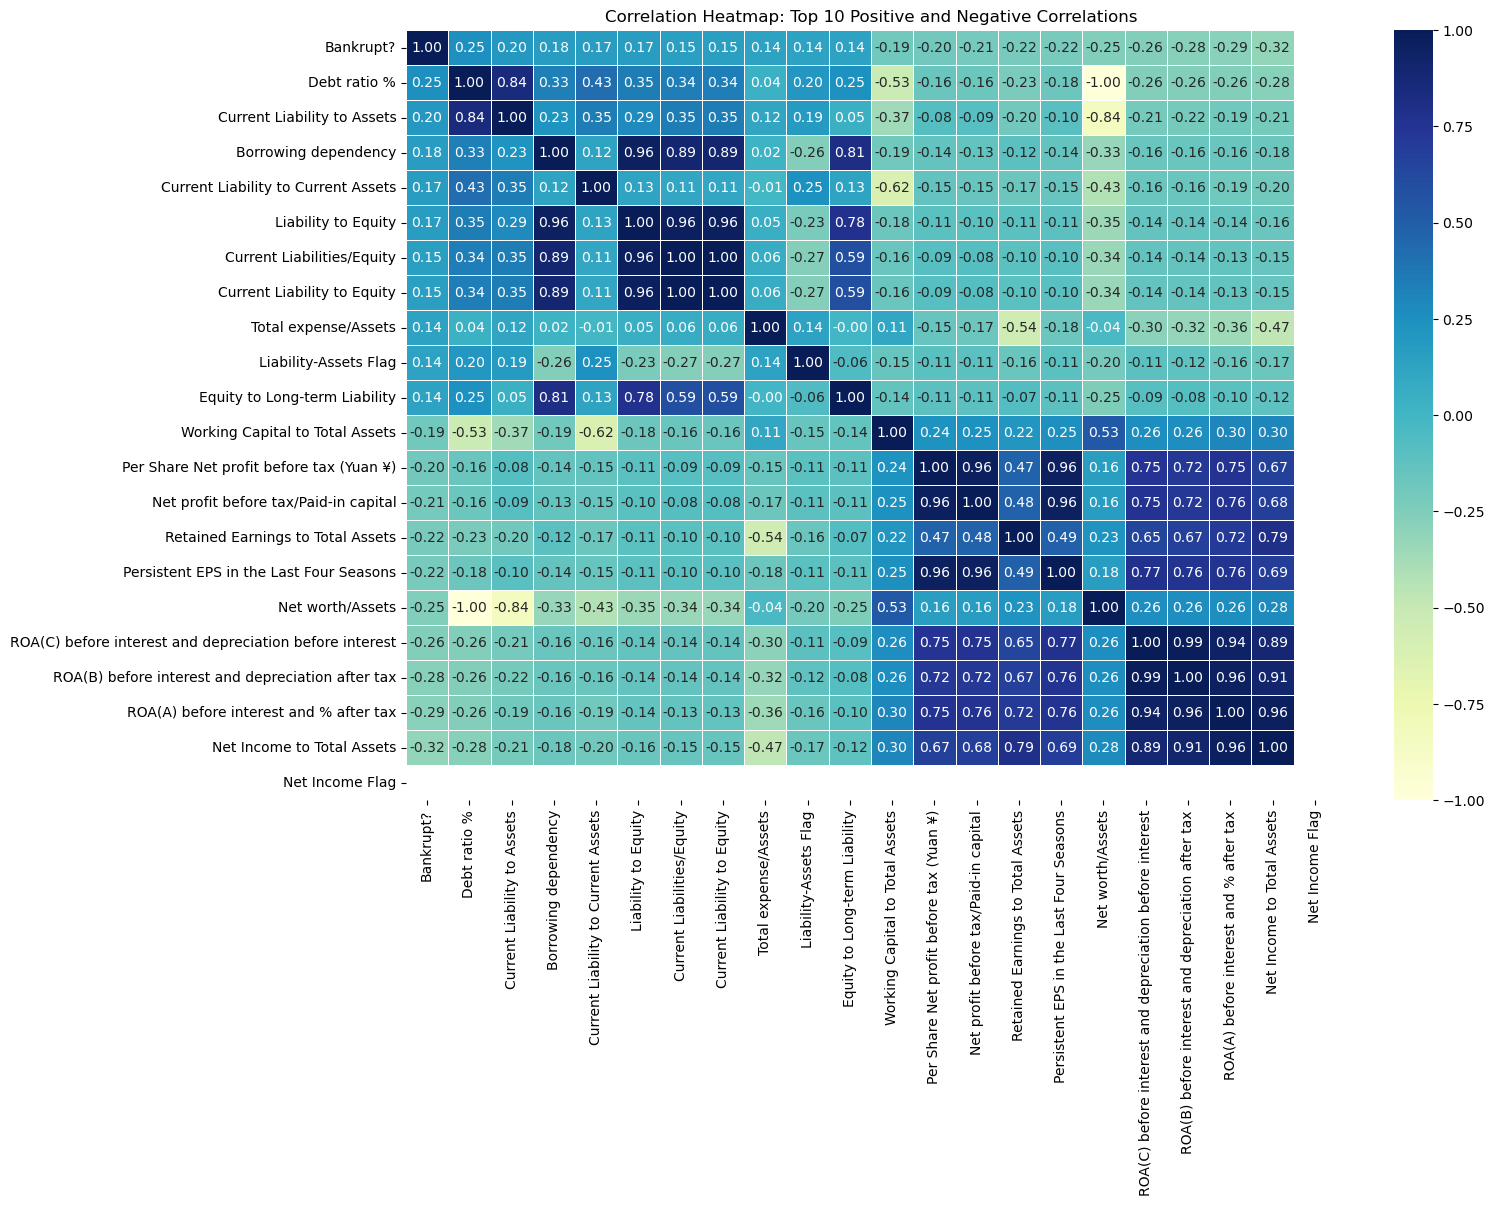

In [22]:
plt.figure(figsize=(15, 10))

sns.heatmap(df[top_features.index].corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap: Top 10 Positive and Negative Correlations")
plt.show()


### Observations:
- Most observations have values between 0 and 1 while observations like 'Operating Expense Rate' consist of very large distribution, attention to normalize this will be given during the preprocessing phase for model training
- There are several highly correlated features, which may require dimensionality reduction techniques like feature selection to avoid multicollinearity issues
- Top Features with `positive correlation` with bankrupcy include: Debt Ratio (0.25),Current Liability to Asset (0.20), Borrowing Dependency (0.17), Current Liability to Current Assets (0.17)
- Top Features with `negative correlation` with bankrupcy include:Net Income to Total Assets (-0.31), ROA(A) before interest and % after tax (-0.28), ROA(B) before interest and depreciation after tax	(-0.27), ROA(C) before interest and depreciation before interest (-0.26).

Therefore these features are likely key predictors of bankruptcy and should be prioritized for feature engineering.

`But before this conclusion can be made, it is important to confirm that these correlation coefficients are statistically significant. This can be examined using the p-value test `


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [23]:
from scipy import stats

for param in ["Debt ratio %", "Current Liability to Assets", "Borrowing dependency", "Current Liability to Current Assets", 
              "Liability to Equity", "Current Liabilities/Equity", "Current Liability to Equity", "Total expense/Assets","Liability-Assets Flag",
              "Equity to Long-term Liability", "Working Capital to Total Assets", "Per Share Net profit before tax (Yuan ¥)", 
              "Net profit before tax/Paid-in capital", "Retained Earnings to Total Assets", "Persistent EPS in the Last Four Seasons", 
              "Net worth/Assets", "ROA(C) before interest and depreciation before interest", "ROA(B) before interest and depreciation after tax",
              "ROA(A) before interest and % after tax", "Net Income to Total Assets"]:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Bankrupt?'])
    print("---")
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
    
    if p_value < 0.001:
        print(f"{p_value} < 0.001, there is strong evidence that the correlation is significant.")
    elif p_value < 0.05:
        print(f"{p_value} < 0.05,  there is moderate evidence that the correlation is significant.")
    elif p_value < 0.1:
        print(f"{p_value} < 0.1,  there is weak evidence that the correlation is significant.")
    elif p_value > 0.1:
        print(f"{p_value} > 0.1,  there is no evidence that the correlation is significant.")

---
Debt ratio %
The Pearson Correlation Coefficient for  Debt ratio %  is 0.25153109324710865  with a P-value of P = 1.059904290799691e-96
1.059904290799691e-96 < 0.001, there is strong evidence that the correlation is significant.
---
Current Liability to Assets
The Pearson Correlation Coefficient for  Current Liability to Assets  is 0.1961348567503191  with a P-value of P = 8.675617560582056e-59
8.675617560582056e-59 < 0.001, there is strong evidence that the correlation is significant.
---
Borrowing dependency
The Pearson Correlation Coefficient for  Borrowing dependency  is 0.17634900499448802  with a P-value of P = 1.0754402615380388e-47
1.0754402615380388e-47 < 0.001, there is strong evidence that the correlation is significant.
---
Current Liability to Current Assets
The Pearson Correlation Coefficient for  Current Liability to Current Assets  is 0.17162091990669906  with a P-value of P = 3.14776277675104e-45
3.14776277675104e-45 < 0.001, there is strong evidence that the corre

#### Therefore these features are key predictors of bankruptcy and should be prioritized for feature engineering.


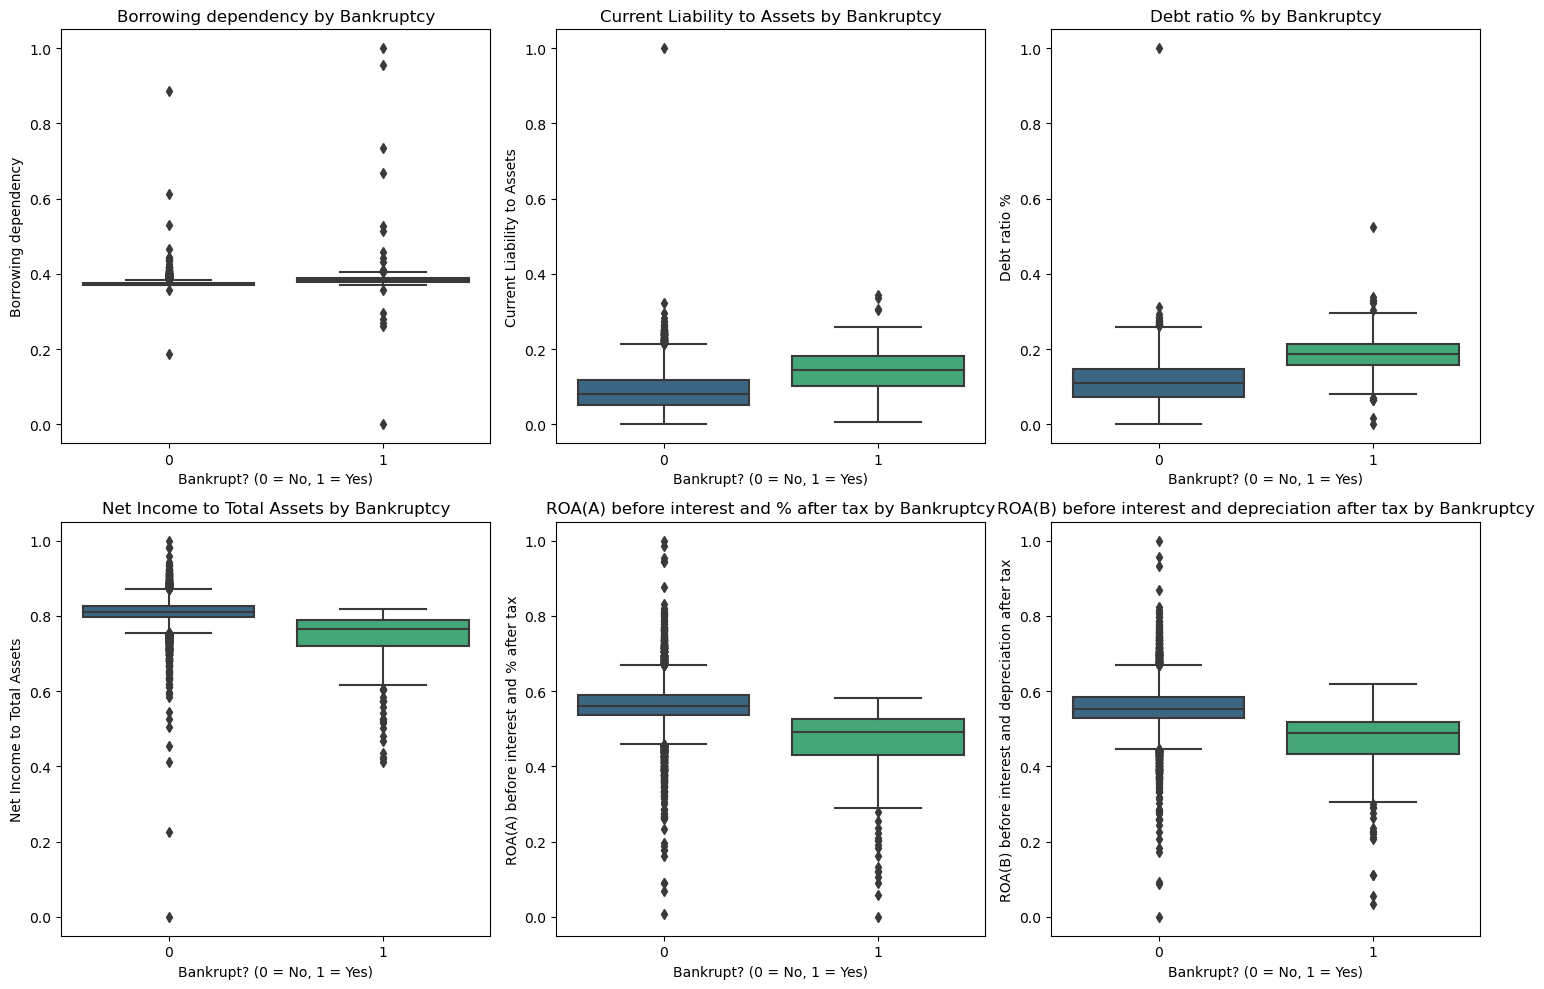

In [24]:
# Next we select key features for visualization
positive_features = df[["Debt ratio %", "Current Liability to Assets", "Borrowing dependency"]]
negative_features = df[["Net Income to Total Assets", "ROA(A) before interest and % after tax", "ROA(B) before interest and depreciation after tax"]]
selected_features = positive_features + negative_features

# Visualize distributions for selected features grouped by bankruptcy status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x="Bankrupt?", y=feature, palette="viridis")
    plt.title(f"{feature} by Bankruptcy")
    plt.xlabel("Bankrupt? (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.tight_layout()

plt.show()


In [25]:
# positive_features = df[["Debt ratio %", "Current Liability to Assets", "Borrowing dependency"]]
# negative_features = df[["Net Income to Total Assets", "ROA(A) before interest and % after tax", "ROA(B) before interest and depreciation after tax"]]
# selected_features = positive_features + negative_features

# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(positive_features.columns.tolist() + negative_features.columns.tolist(), 1):
#     plt.subplot(2, 3, i)
#     sns.regplot(
#         data=df, 
#         x=feature, 
#         y="Bankrupt?", 
#         scatter_kws={'alpha': 0.5},  # Adjust transparency for clarity
#         line_kws={'color': 'red'},  # Regression line color
#         lowess=True  # Use lowess smoothing for the regression line
#     )
#     plt.title(f"Regression Plot: {feature} vs Bankruptcy")
#     plt.xlabel(feature)
#     plt.ylabel("Bankrupt? (0 = No, 1 = Yes)")
#     plt.tight_layout()

# plt.show()


In [26]:
corr_feat = df[["Bankrupt?", "Debt ratio %", "Current Liability to Assets", "Borrowing dependency", "Net Income to Total Assets", "ROA(A) before interest and % after tax", "ROA(B) before interest and depreciation after tax"]]
corr_feat.groupby("Bankrupt?").mean()

Debt ratio %  Current Liability to Assets  Borrowing dependency  \
Bankrupt?                                                                    
0              0.110822                     0.088862              0.374166   
1              0.187162                     0.144334              0.390451   

           Net Income to Total Assets  ROA(A) before interest and % after tax  \
Bankrupt?                                                                       
0                            0.809966                                0.561839   
1                            0.737797                                0.456548   

           ROA(B) before interest and depreciation after tax  
Bankrupt?                                                     
0                                                   0.556563  
1                                                   0.461155

- Notice that on an average, the higher the `debt ratio`, `current liability to assests` and `borrowing dependency` the more likely the record is bankrupt while 
- Higher `Net income to Total Assest`, and ROAs suggested the comapnies where still in business

#### Top Features with Positive Correlation
1. Debt Ratio: The proportion of total liabilities to total assets.

A high debt ratio indicates that a company relies heavily on borrowed funds to finance its operations. This increases financial risk, particularly if cash flows are insufficient to meet debt obligations. Companies with excessive leverage are more vulnerable to economic downturns or revenue declines, leading to bankruptcy.

2. Current Liability to Asset: The ratio of current liabilities (short-term obligations) to total assets.

A high ratio suggests liquidity issues, meaning the company may struggle to convert assets into cash quickly enough to meet short-term obligations. This indicates poor financial health and increases bankruptcy risk.

3. Borrowing Dependency: A measure of reliance on interest-bearing debt for funding.

Heavy dependency on borrowed capital increases interest expenses, which can erode profitability. When borrowing is unsustainable, the company risks defaulting on debt, leading to insolvency.

4. Current Liability to Current Assets (0.17): A liquidity ratio showing the proportion of current liabilities to current assets.

This ratio indicates whether a company has enough short-term assets to cover its short-term liabilities. A high value implies liquidity stress, often a precursor to financial distress and bankruptcy.

---

#### Top Features with Negative Correlation
1. Net Income to Total Assets: A profitability metric showing net income relative to total assets.

A higher value indicates that the company is efficiently using its assets to generate profits. Profitable companies are less likely to face financial distress, making this a strong negative predictor of bankruptcy.

2. ROA(A) Before Interest and % After Tax: A return on assets metric focusing on pre-interest and after-tax profits.

Like Net Income to Total Assets, ROA measures profitability and efficiency in asset utilization. A higher ROA signifies a healthy, sustainable business, reducing bankruptcy risk.


3. ROA(B) Before Interest and Depreciation After Tax: Similar to ROA(A), but accounts for depreciation.

Including depreciation provides a clearer picture of asset utilization in generating returns. Efficient operations and higher returns suggest financial stability, decreasing bankruptcy likelihood.

4. ROA(C) Before Interest and Depreciation Before Interest: Focuses on profitability before interest and depreciation expenses.

High ROA(C) reflects operational efficiency, as it isolates core profitability before financing or non-cash expenses. Companies with robust operational performance are less prone to financial collapse.

---

- **Positive Predictors** highlight a company’s vulnerabilities in managing debt and liquidity. These factors are often early warning signs of financial distress.
- **Negative Predictors** reflects operational efficiency and profitability, which act as strong buffers against bankruptcy.

This interplay between debt reliance and profitability forms the basis of many bankruptcy prediction models, such as the Altman Z-score. These features help flag financial health and stability, which are crucial for survival in competitive markets.

---

### **Bankruptcy Prediction in Industry and Research**

Bankruptcy prediction is a critical area of focus in finance, aimed at identifying firms at risk of insolvency to mitigate credit and operational risks. This problem shares similarities with credit scoring and fraud detection, where the goal is to classify entities based on their financial health. This section outlines approaches used in industry and research to address similar problems, compares them to the current scenario, and evaluates their applicability.

---

### **Techniques Used in Similar Problems**

#### **1. Regression Models**
Regression models, such as Logistic Regression, have been foundational in bankruptcy prediction. For example, Altman’s Z-Score model, developed in 1968, uses financial ratios like working capital to total assets and retained earnings to total assets to calculate a company’s bankruptcy probability. Logistic Regression remains a benchmark due to its interpretability, enabling financial analysts to understand the contribution of individual variables to insolvency risk (Altman, 1968).

#### **2. Machine Learning Approaches**
Recent advancements have introduced machine learning models for greater accuracy:
- **Random Forest and Gradient Boosting**: These ensemble methods are widely used in corporate risk assessment. A study by Toloşi and Lengauer (2011) demonstrated their ability to handle non-linear relationships and feature interactions, making them suitable for datasets like ours with complex financial attributes.
- **Support Vector Machines (SVM)**: SVM models have been applied in credit scoring for their effectiveness in high-dimensional data spaces, as shown in research by Huang et al. (2004).

#### **3. Neural Networks**
Neural networks have shown promise in modeling bankruptcy prediction due to their ability to uncover hidden patterns. A comparative study by Min and Lee (2005) found that neural networks outperformed traditional statistical models, especially when non-linear relationships dominate.

#### **4. Clustering Techniques**
Clustering is less common in direct bankruptcy prediction but is employed in exploratory stages. For instance, K-means clustering has been used to segment firms based on financial attributes, aiding in identifying high-risk groups (Zhao et al., 2017).

---

The problem of predicting bankruptcy based on financial metrics in the provided dataset aligns closely with industry applications such as credit risk modeling. However, some distinctions can be made:

1. **Nature of Data**:
   - The dataset consists of financial ratios derived from operational and profitability metrics, similar to those used in Altman’s Z-Score and credit scoring models.
   - Unlike real-time fraud detection systems, bankruptcy prediction relies on static or historical financial data.

2. **Techniques**:
   - Logistic Regression and Random Forest remain strong contenders for this task due to their balance of interpretability and predictive power.
   - Neural Networks could be considered if the dataset reveals highly non-linear relationships, though their opacity might be a drawback in financial contexts requiring transparency.

3. **Performance Metrics**:
   - Industry standards, such as the F1-score and Precision-Recall AUC, would be employed to assess model performance given the dataset’s class imbalance.

---

### **Analogous Case Studies**

1. **Altman Z-Score**:
   Altman’s model remains a cornerstone in bankruptcy prediction. While simplistic, its reliance on regression principles highlights the importance of ratios like profitability and leverage, which are present in our dataset.

2. **Corporate Bankruptcy Prediction in Taiwan**:
   Research by Lin et al. (2012) used ensemble methods, including Random Forest, to predict insolvency among Taiwanese firms. Their findings underscore the importance of data pre-processing and feature selection in achieving high accuracy.

3. **Credit Risk Assessment in Banking**:
   Studies by Khandani et al. (2010) employed Gradient Boosting for credit risk modeling, demonstrating the robustness of boosting algorithms in financial classification tasks.

---

### **Conclusion**

The current problem benefits from adopting a hybrid approach, starting with Logistic Regression for baseline interpretability, followed by advanced methods like Random Forest or Gradient Boosting for improved accuracy. While neural networks offer potential for uncovering hidden patterns, their complexity and lack of transparency may limit their utility in financial domains. 

References:  
- Altman, E. I. (1968). Financial ratios, discriminant analysis and the prediction of corporate bankruptcy. *The Journal of Finance*.  
- Huang, Z., et al. (2004). Credit scoring with a data mining approach based on SVM. *Expert Systems with Applications*.  
- Min, J., & Lee, Y. C. (2005). Bankruptcy prediction using support vector machine with optimal choice of kernel function parameters. *Expert Systems with Applications*.  
- Zhao, X., et al. (2017). Risk assessment for financial services using clustering techniques. *Journal of Risk Management*.  

---



## Task 3: Data pre-processing 
Execute appropriate data preprocessing steps in Python to generate data for model training. Perform data cleaning, outlier detection, normalization, or transformation of variables if necessary.
Each preprocessing step should be justified in the report, explaining its significance and impact on model performance. For instance, discuss why certain features were selected or removed and why scaling methods like standardization or normalization were applied. 


So far we've noticed certain issues with the dataset which include:
- Inbalance of classes in the target variable, Bankrupt?
- Multicollinearity in the independent variables, which can be dealt with using dimensionality reduction techniques in this case a feature selection can be implemented
- Wide and diverse ranges of datapoints in the dataset, this can be handled using normalization
### Steps to follow:
- Identify and handle missing values
- Identify and handle duplicates

These steps are essential before training a model, next
- Train a basic classification model on the dataset
- Perform other pre-processing techniques (outliers, normalization, feature selection, balancing) as needed and compare the model's performance after each

In [27]:
# Identify missing values: are there missing values
df.isna().sum().sort_values(ascending=False)

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
Total expense/Assets                                       0
Total income/Total expense                                 0
Retained Earnings to Total Assets                          0
Long-term Liability to Current Assets                      0
Current Liabilities/Equity                                 0
Working Capital/Equity                                     0
Current Liabilities/Liability                              0
Inventory/Current Liability                                0
Inventory/Working Capital                                  0
Operating Funds to Liability                               0
Current Liability to Assets                                0
Cash/Current Liability                                     0
Quick Assets/Current Liability                             0
Cash/Total Assets                                          0
Current Assets/Total Ass

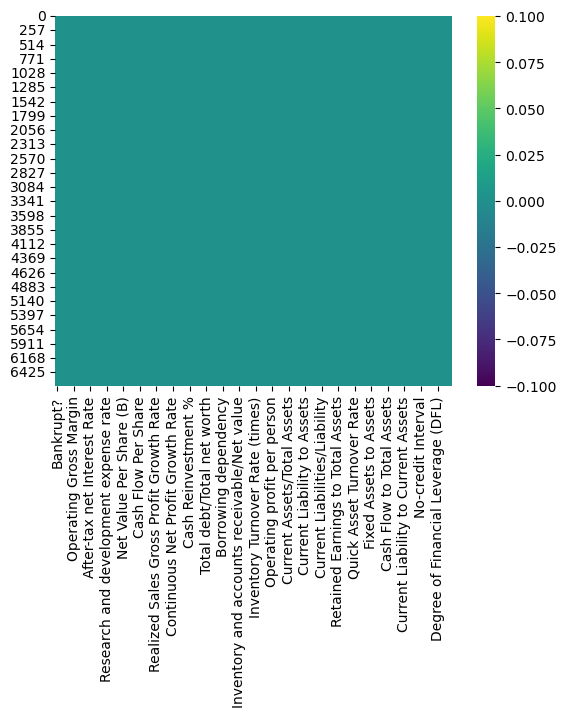

In [28]:
# visulaize missing values if any
sns.heatmap(df.isna(), cmap="viridis")
plt.show()

There is no missing values in the dataset, all datapoints are carrying an
information

In [29]:
# Identify duplicates: are there repeated records in this dataset
df.duplicated().sum()

0

In [30]:
df.loc[df.duplicated()]

Empty DataFrame
Columns: [Bankrupt?, ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax, ROA(B) before interest and depreciation after tax, Operating Gross Margin, Realized Sales Gross Margin, Operating Profit Rate, Pre-tax net Interest Rate, After-tax net Interest Rate, Non-industry income and expenditure/revenue, Continuous interest rate (after tax), Operating Expense Rate, Research and development expense rate, Cash flow rate, Interest-bearing debt interest rate, Tax rate (A), Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C), Persistent EPS in the Last Four Seasons, Cash Flow Per Share, Revenue Per Share (Yuan ¥), Operating Profit Per Share (Yuan ¥), Per Share Net profit before tax (Yuan ¥), Realized Sales Gross Profit Growth Rate, Operating Profit Growth Rate, After-tax Net Profit Growth Rate, Regular Net Profit Growth Rate, Continuous Net Profit Growth Rate, Total Asset Growth Rate, Net Value Growth Rate, Total Asset Return Growth Rate Ratio, Cash Reinvestment %, Current Ratio, Quick Ratio, Interest Expense Ratio, Total debt/Total net worth, Debt ratio %, Net worth/Assets, Long-term fund suitability ratio (A), Borrowing dependency, Contingent liabilities/Net worth, Operating profit/Paid-in capital, Net profit before tax/Paid-in capital, Inventory and accounts receivable/Net value, Total Asset Turnover, Accounts Receivable Turnover, Average Collection Days, Inventory Turnover Rate (times), Fixed Assets Turnover Frequency, Net Worth Turnover Rate (times), Revenue per person, Operating profit per person, Allocation rate per person, Working Capital to Total Assets, Quick Assets/Total Assets, Current Assets/Total Assets, Cash/Total Assets, Quick Assets/Current Liability, Cash/Current Liability, Current Liability to Assets, Operating Funds to Liability, Inventory/Working Capital, Inventory/Current Liability, Current Liabilities/Liability, Working Capital/Equity, Current Liabilities/Equity, Long-term Liability to Current Assets, Retained Earnings to Total Assets, Total income/Total expense, Total expense/Assets, Current Asset Turnover Rate, Quick Asset Turnover Rate, Working capitcal Turnover Rate, Cash Turnover Rate, Cash Flow to Sales, Fixed Assets to Assets, Current Liability to Liability, Current Liability to Equity, Equity to Long-term Liability, Cash Flow to Total Assets, Cash Flow to Liability, CFO to Assets, Cash Flow to Equity, Current Liability to Current Assets, Liability-Assets Flag, Net Income to Total Assets, Total assets to GNP price, No-credit Interval, Gross Profit to Sales, Net Income to Stockholder's Equity, Liability to Equity, Degree of Financial Leverage (DFL), Interest Coverage Ratio (Interest expense to EBIT), Net Income Flag, Equity to Liability]
Index: []

There are no duplicated observation, each record is unique.

In [31]:
# Train on simple classification models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Separate features and target
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_lr_proba = log_reg.predict_proba(X_test)[:, 1]

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_svc_proba = svc.predict_proba(X_test)[:, 1]

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Train on the scaled data for uniformity
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

# Step 3: Evaluate Each Model
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_lr_proba))

print("\nKNN Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVC Report:")
print(classification_report(y_test, y_pred_svc))
print("SVC AUC-ROC:", roc_auc_score(y_test, y_pred_svc_proba))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf_proba))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1289
           1       0.08      0.02      0.04        44

    accuracy                           0.96      1333
   macro avg       0.52      0.51      0.51      1333
weighted avg       0.94      0.96      0.95      1333

Logistic Regression AUC-ROC: 0.5654841667254391

KNN Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1289
           1       0.25      0.02      0.04        44

    accuracy                           0.97      1333
   macro avg       0.61      0.51      0.51      1333
weighted avg       0.94      0.97      0.95      1333


SVC Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1289
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1333
   macro avg       0.48   

In [32]:
#Visualizing evaluation scores

# Step 1: Prepare Data
data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'KNN', 'KNN', 'SVC', 'SVC', 'Random Forest', 'Random Forest'],
    'Label': [0, 1, 0, 1, 0, 1, 0, 1],
    'Precision': [0.97, 0.08, 0.97, 0.25, 0.97, 0.00, 0.98, 0.60],
    'Recall': [0.99, 0.02, 1.00, 0.02, 1.00, 0.00, 0.99, 0.27],
    'F1-Score': [0.98, 0.04, 0.98, 0.04, 0.98, 0.00, 0.98, 0.37]
}

df2 = pd.DataFrame(data)

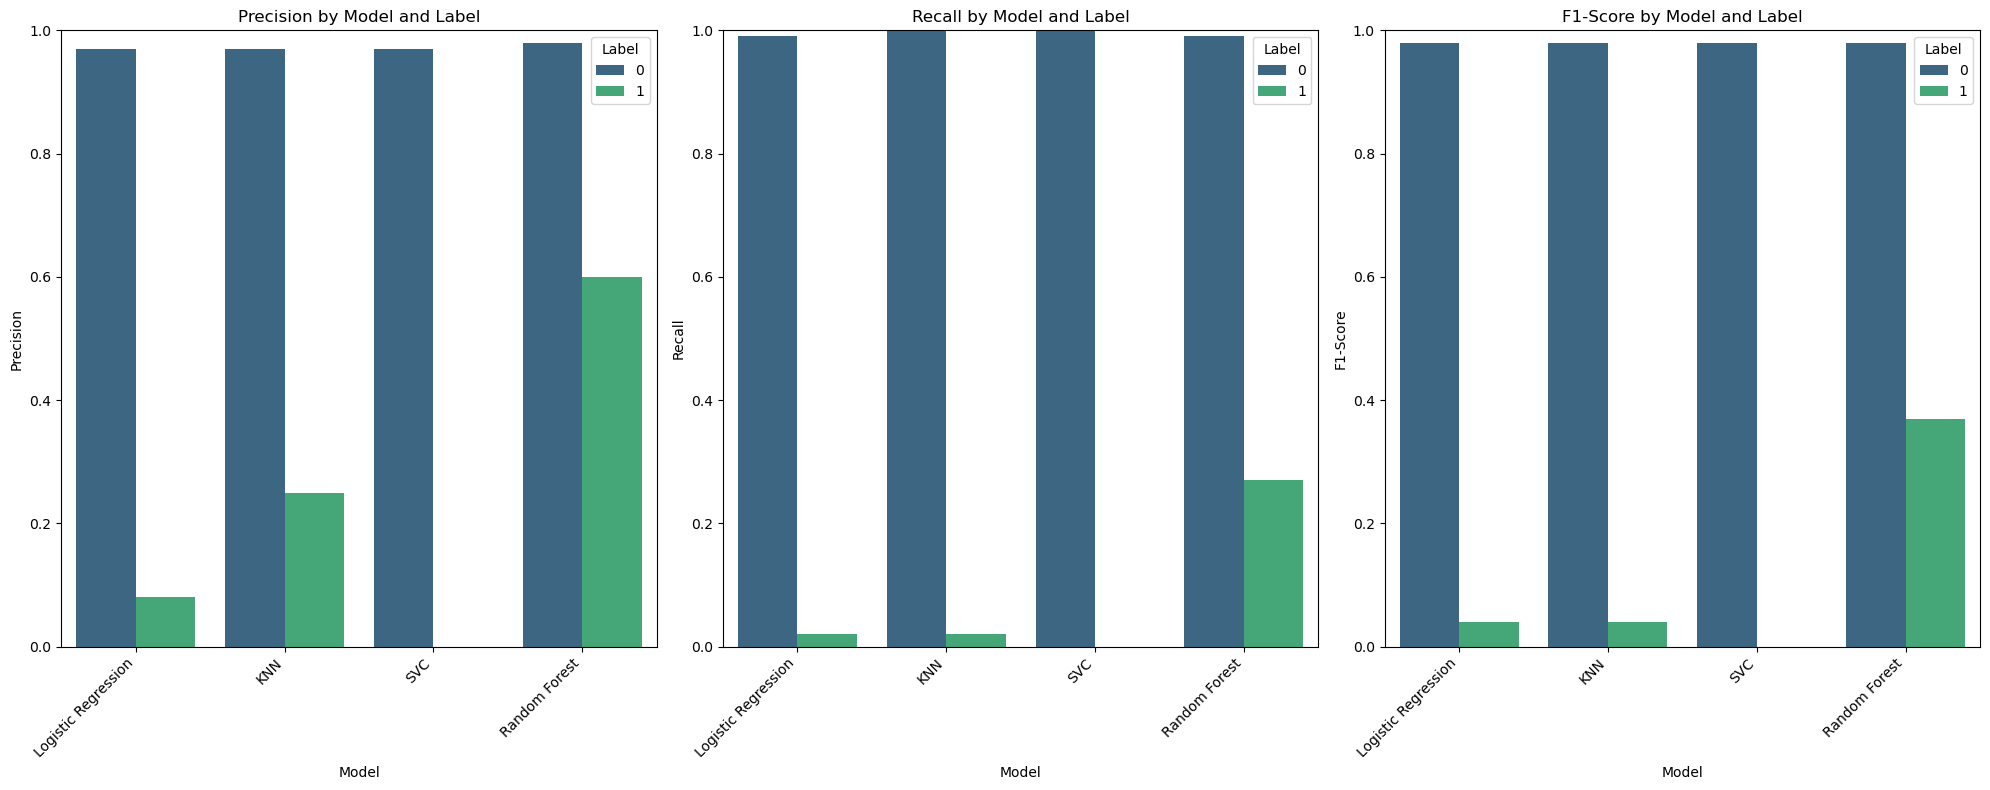

In [33]:
# Step 2: Plot Metrics for Each Model
metrics = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(20, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=df2, x='Model', y=metric, hue='Label', palette='viridis')
    plt.title(f'{metric} by Model and Label')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)  # To normalize all graphs for comparison
    plt.legend(title='Label', loc='upper right')

plt.tight_layout()
plt.show()

---
### **Observations**

- Across all models, the bars for Precision, Recall, and F1-Score for Class 0 are consistently high (close to 1.0). This reflects the models' strong ability to identify and correctly classify non-bankrupt companies while the bars for Precision, Recall, and F1-Score for Class 1 are significantly lower, often close to 0. This dominance is due to the overwhelming proportion of Class 0 instances in the dataset and highlights the models' struggle to handle the minority class effectively.

#### Key Insights 
- Severe Class Imbalance:The stark difference between the heights of the bars for Class 0 and Class 1 across all metrics and models highlights the dominance of the majority class and the models’ inability to generalize for the minority class.
- Misleading Overall Performance:While the plots for Class 0 metrics suggest excellent performance, the near-zero values for Class 1 metrics reveal critical limitations in predicting bankrupt companies, which is the primary objective.

`Random Forest consistently shows higher bars for Class 1 metrics, making it the most effective model for handling the imbalanced data, even without preprocessing.
SVC’s complete failure for Class 1 (flat bars at 0) demonstrates its unsuitability for this imbalanced dataset without further preprocessing.`


In addition to the these observations, the `high accuracy and ROC-AUC scores` across the models require specific attention. These metrics, though seemingly favorable, can be misleading due to the characteristics of the dataset
- Accuracy is heavily influenced by the dominance of Class 0, which constitutes 96.7% of the dataset. Models can achieve high accuracy simply by predicting the majority class (Class 0) for almost all instances, even if they fail to capture any minority class cases (Class 1).
- These metrics emphasize the need for class-specific evaluations (Precision, Recall, F1-Score for Class 1) to ensure the model is suitable for the problem at hand.
- They also highlight the need for class balancing (e.g., SMOTE) to ensure meaningful evaluation and practical utility for bankruptcy prediction, particularly for the minority class.



#### Performing Class Balancing Technique: SMOTE
Common class balancing techniques include under-sampling and over-sampling. Under-sampling reduces the number of majority class samples to balance the sample proportions between classes, while over-sampling replicates or generates minority class samples to increase their quantity, 

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique designed to handle class imbalance by generating synthetic samples for the minority class. It does this by creating new data points along the line segments connecting existing minority class instances, rather than simply duplicating them.

How SMOTE Works
For a given minority class instance, SMOTE selects its k-nearest neighbors (default is 5).
It randomly picks one of these neighbors.
A synthetic instance is generated by interpolating between the feature values of the original instance and its neighbor.

`We therefore perfome the SMOTE technique and retrain the baseline model.`

In [34]:
#importing smote
from imblearn.over_sampling import SMOTE

# Split dataset into features and target
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution after SMOTE:
Bankrupt?
0    5157
1    5157
Name: count, dtype: int64


In [35]:
# Let's compare the initial distribution of samples on our target variable "Bankrupt?"
df["Bankrupt?"].value_counts()

Bankrupt?
0    6446
1     219
Name: count, dtype: int64

#### **Now we retrain the baseline model on the balanced dataset and compare result**


In [36]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)
y_pred_lr_proba = log_reg.predict_proba(X_test)[:, 1]

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)

# SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_resampled, y_train_resampled)
y_pred_svc = svc.predict(X_test)
y_pred_svc_proba = svc.predict_proba(X_test)[:, 1]

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)  # Train on the scaled data for uniformity
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

# Step 3: Evaluate Each Model
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_lr_proba))

print("\nKNN Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVC Report:")
print(classification_report(y_test, y_pred_svc))
print("SVC AUC-ROC:", roc_auc_score(y_test, y_pred_svc_proba))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf_proba))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1289
           1       0.04      0.32      0.08        44

    accuracy                           0.74      1333
   macro avg       0.51      0.54      0.46      1333
weighted avg       0.94      0.74      0.82      1333

Logistic Regression AUC-ROC: 0.585936949009098

KNN Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1289
           1       0.06      0.30      0.11        44

    accuracy                           0.84      1333
   macro avg       0.52      0.57      0.51      1333
weighted avg       0.94      0.84      0.88      1333


SVC Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1289
           1       0.08      0.55      0.14        44

    accuracy                           0.78      1333
   macro avg       0.53    

In [37]:
#Visualizing evaluation scores

# Step 1: Prepare Data
data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'KNN', 'KNN', 'SVC', 'SVC', 'Random Forest', 'Random Forest'],
    'Label': [0, 1, 0, 1, 0, 1, 0, 1],
    'Precision': [0.97, 0.04, 0.97, 0.06, 0.98, 0.08, 0.99, 0.42],
    'Recall': [0.76, 0.32, 0.85, 0.30, 0.79, 0.55, 0.97, 0.57],
    'F1-Score': [0.85, 0.08, 0.91, 0.11, 0.87, 0.14, 0.98, 0.49]
}

df2 = pd.DataFrame(data)

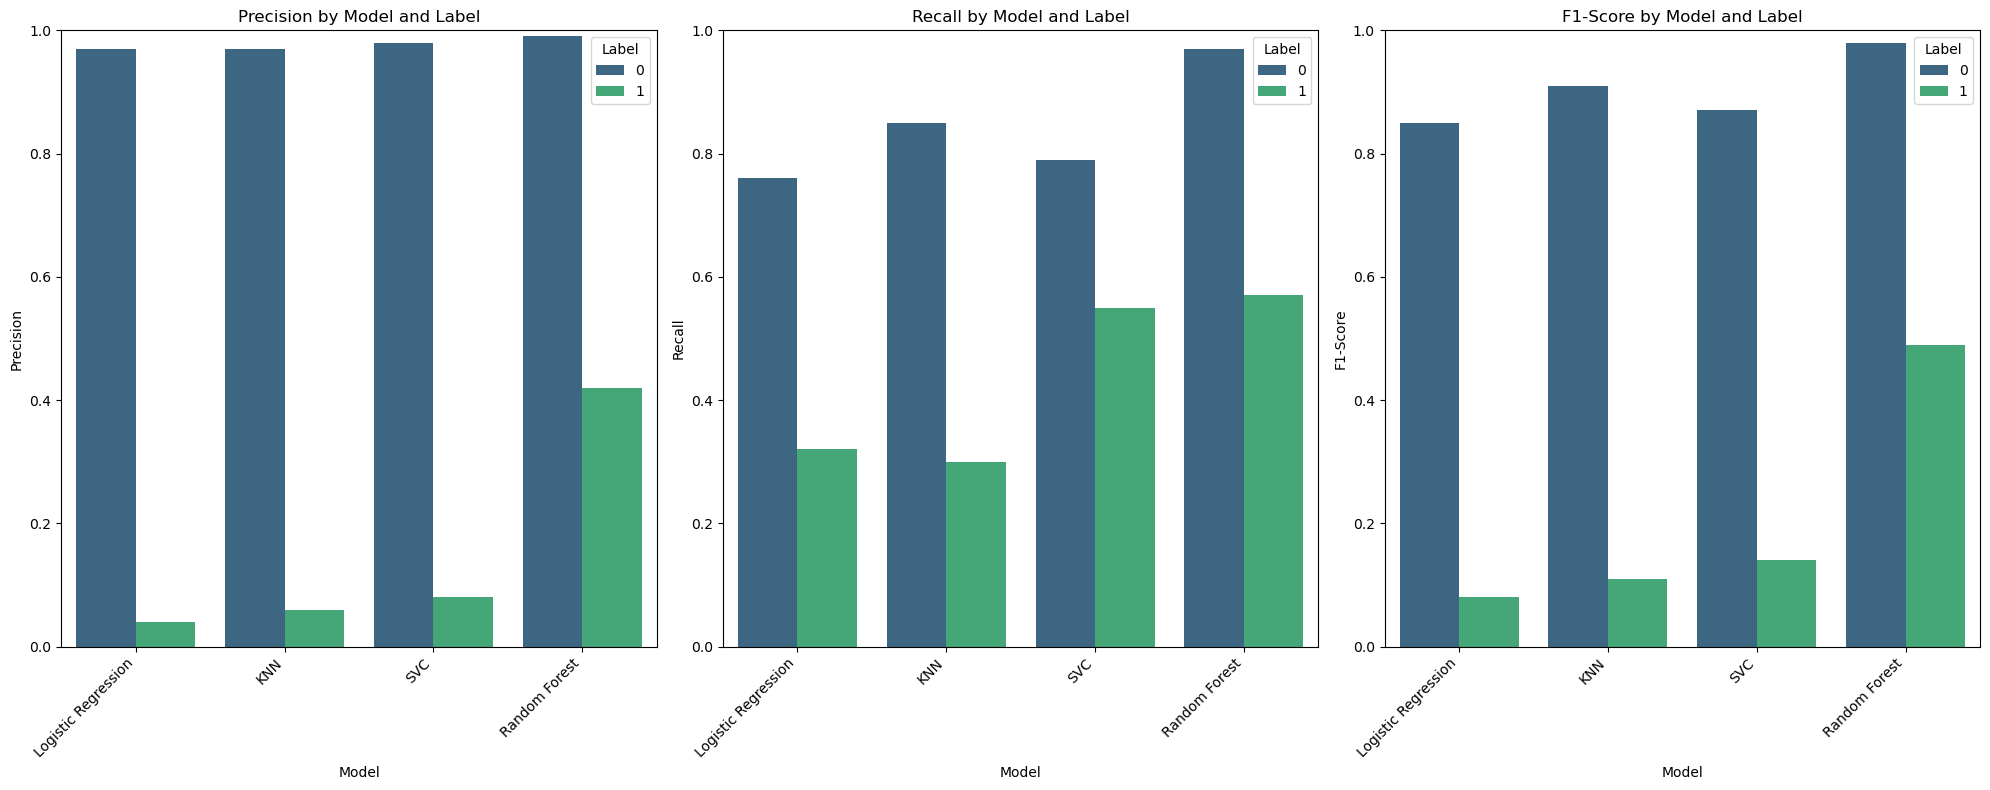

In [38]:
# Step 2: Plot Metrics for Each Model
metrics = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(20, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=df2, x='Model', y=metric, hue='Label', palette='viridis')
    plt.title(f'{metric} by Model and Label')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)  # To normalize all graphs for comparison
    plt.legend(title='Label', loc='upper right')

plt.tight_layout()
plt.show()

### **Observations**
- The SMOTE technique has been applied to balance the class distribution in the training data, and the models have been retrained. The impact of this class balancing step is evident in the new performance metrics, particularly for the minority class (Bankrupt? = 1).

#### **Key Insights**
- Improved Recall for Class 1:Across all models, SMOTE significantly increased recall for Class 1, showing its effectiveness in enabling the models to identify more bankrupt cases. The improvement was most pronounced for SVC (from 0% to 55%) and Logistic Regression (from 2% to 32%).
- Trade-Offs: Precision for Class 1 dropped for all models due to the increase in false positives. Overall accuracy decreased slightly, reflecting the models' shift in focus to better accommodate Class 1 predictions.

`Random Forest emerged as the best model post-SMOTE, achieving the highest F1-Score (49%) and AUC-ROC (0.95) for Class 1.`

#### **Perfoming Normalization: Using Standard Scaler**
- Since features are on very different scales, the optimizer may be struggling to converge efficiently, and some features could dominate the learning process. Scaling ensures that all features are on the same scale, leading to better model performance and faster convergence. Although random forest clasiifier is unvariant to scaling, other classification models can be used to test the significance of this technique, such as KNN, Logistic Regression and SVC
- Gradient and Distance Based Models:Logistic Regression, KNN, and SVC rely on gradients or distance calculations, making them highly sensitive to feature magnitudes. Standard Scaling ensures these models treat all features equally, improving convergence and decision boundaries.



In [39]:
from sklearn.preprocessing import StandardScaler

# Step 1: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Scaled training data (resampled with SMOTE)
X_test_scaled = scaler.transform(X_test)  # Scaled test data (original distribution)

# Step 2: Train and Evaluate Models

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_lr_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_resampled)
y_pred_knn = knn.predict(X_test_scaled)

# SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train_resampled)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_svc_proba = svc.predict_proba(X_test_scaled)[:, 1]

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_resampled)  # Train on the scaled data for uniformity
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Step 3: Evaluate Each Model
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_lr_proba))

print("\nKNN Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVC Report:")
print(classification_report(y_test, y_pred_svc))
print("SVC AUC-ROC:", roc_auc_score(y_test, y_pred_svc_proba))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf_proba))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1289
           1       0.21      0.75      0.32        44

    accuracy                           0.90      1333
   macro avg       0.60      0.83      0.63      1333
weighted avg       0.96      0.90      0.92      1333

Logistic Regression AUC-ROC: 0.8682029762324563

KNN Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1289
           1       0.18      0.66      0.29        44

    accuracy                           0.89      1333
   macro avg       0.58      0.78      0.61      1333
weighted avg       0.96      0.89      0.92      1333


SVC Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1289
           1       0.21      0.57      0.31        44

    accuracy                           0.92      1333
   macro avg       0.60   

In [40]:
#Visualizing evaluation scores

# Step 1: Prepare Data
data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'KNN', 'KNN', 'SVC', 'SVC', 'Random Forest', 'Random Forest'],
    'Label': [0, 1, 0, 1, 0, 1, 0, 1],
    'Precision': [0.99, 0.21, 0.99, 0.18, 0.98, 0.21, 0.99, 0.38],
    'Recall': [0.90, 0.75, 0.90, 0.66, 0.93, 0.57, 0.96, 0.64],
    'F1-Score': [0.94, 0.32, 0.94, 0.29, 0.96, 0.31, 0.98, 0.47]
}

df2 = pd.DataFrame(data)

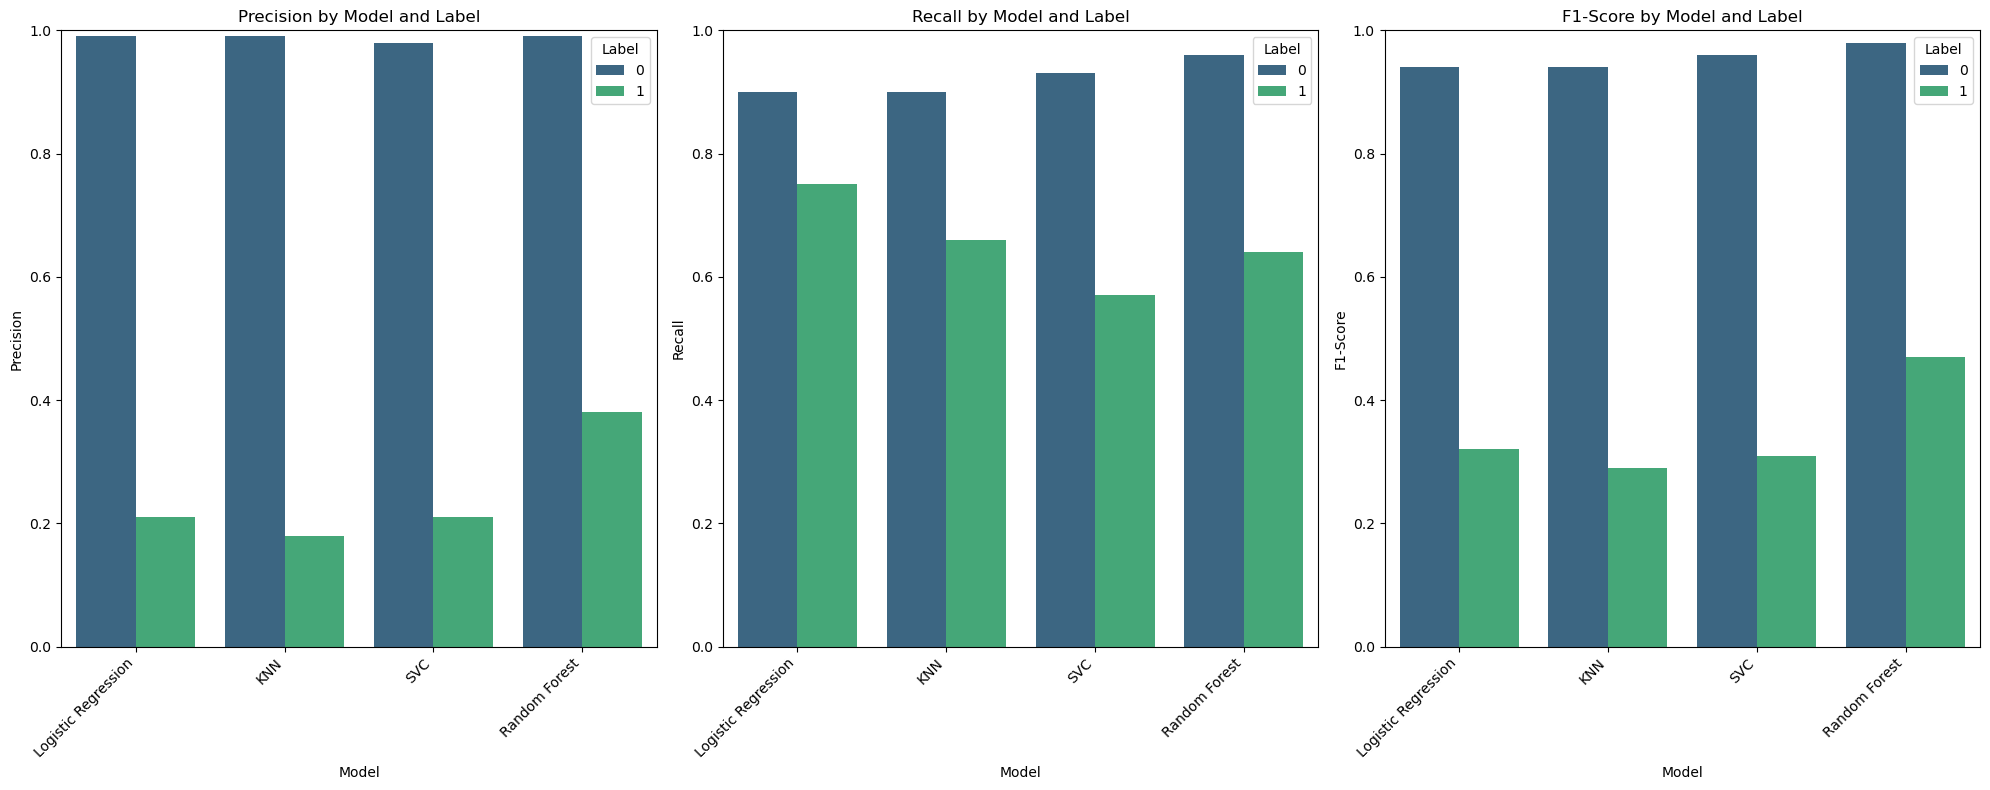

In [41]:
# Step 2: Plot Metrics for Each Model
metrics = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(20, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=df2, x='Model', y=metric, hue='Label', palette='viridis')
    plt.title(f'{metric} by Model and Label')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)  # To normalize all graphs for comparison
    plt.legend(title='Label', loc='upper right')

plt.tight_layout()
plt.show()


- Models like Logistic Regression, KNN, and SVC showed notable improvements after applying Standard Scaling
    - Logistic Regression achieved a Class 1 recall of 75%, compared to poor performance without scaling.
    - SVC and KNN also showed moderate improvements in recall and AUC-ROC, highlighting the relevance of scaling for these algorithms.
    - Random Forest, being scale-invariant, maintained strong performance even after scaling, indicating that scaling did not hinder its ability to split data effectively.
    
` Random Forest Emerged as the Best Model: It achieved the best balance of precision, recall, and F1-score for Class 1, with the highest AUC-ROC (0.93).`

### Task 4: Model selection and training 
Select a suitable model to predict the company’s success or bankruptcy. Justify your model choice based on data characteristics, model complexity, interpretability, and handling of class imbalance. Detail the training process, including hyperparameter tuning methods. Apply cross-validation (e.g., k-fold) to avoid overfitting and ensure generalizability. Optimise the model performance.

To Justify our choice of model:
- First we fine-tune the hyperparameters of all four models used and compare their best results
- Next we also explore the models characteristics and strengths
- Lastly we apply cross-validation to avoid overfitting and optimize model's performance


In [42]:
#hyperparamenter tuning for logistic regression

log_reg_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, n_jobs=1, verbose=1)
log_reg_grid.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and best score
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
print("Best score for Logistic Regression:", log_reg_grid.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9064386001947387


In [43]:
#hyperparamenter tuning for KNN

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=1, verbose=1)
knn_grid.fit(X_train_scaled, y_train_resampled)

print("Best parameters for KNN:", knn_grid.best_params_)
print("Best score for KNN:", knn_grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score for KNN: 0.9586973478022316


In [ ]:
# #hyperparamenter tuning for SVC

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# svc_params = {
#     'C': uniform(1, 100),
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# svc_grid = RandomizedSearchCV(svc, svc_params, n_iter=10, cv=3, n_jobs=1, verbose=1)


# # Fit the RandomizedSearchCV to the scaled training data
# svc_grid.fit(X_train_scaled, y_train_resampled)

# # Get the best parameters
# print("Best parameters for SVC:", svc_grid.best_params_)

# # Get the best score achieved during the search
# print("Best score for SVC:", svc_grid.best_score_)

# # Optionally, check the best estimator (the model with the best parameters)
# best_model = svc_grid.best_estimator_


In [ ]:
#hyperparamenter tuning for Random Forest Classifier

# rf_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# rf = RandomForestClassifier()
# rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=1, verbose=1)
# rf_grid.fit(X_train_scaled, y_train_resampled)

# print("Best parameters for Random Forest:", rf_grid.best_params_)
# print("Best score for Random Forest:", rf_grid.best_score_)


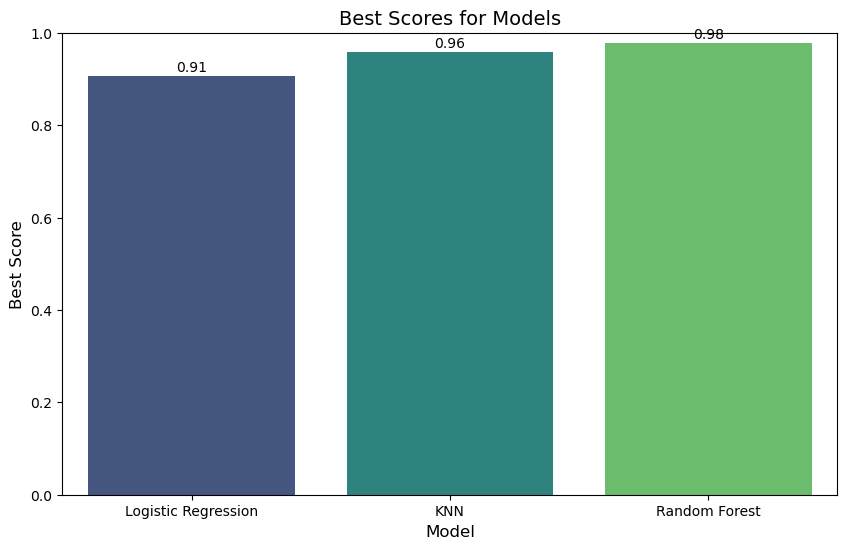

In [44]:
# best scores for each model 
data = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Best Score': [log_reg_grid.best_score_, knn_grid.best_score_, 0.978]  
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Best Score', data=df, palette='viridis')

# Add labels and title
plt.title('Best Scores for Models', fontsize=14)
plt.ylabel('Best Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1

# Annotate bars with the exact score values
for index, row in df.iterrows():
    plt.text(index, row['Best Score'] + 0.01, f"{row['Best Score']:.2f}", ha='center', fontsize=10)

plt.show()


### **Model Choice: Random Forest Classifier**
**Justification:** 
1. Data Characteristics
- The dataset is highly imbalanced, with Class 0 (Non-Bankrupt) dominating over Class 1 (Bankrupt) though already balanced at this point using the SMOTE technique, Random Forest handles class imbalance effectively by leveraging techniques such as adjusting class weights during training, this was seen through it's relatively high score even before the class balancing and scaling preprocessing techniques were applied.
- Random Forest captures both linear and non-linear relationships in the data, making it suitable for datasets with complex patterns. It is less sensitive to correlated features compared to models like Logistic Regression.
2. Model Complexity
- Random Forest uses an ensemble of decision trees, allowing it to model intricate relationships without assuming a specific functional form (like Logistic Regression does). It is inherently robust against overfitting due to averaging across multiple trees.
- While Random Forest is computationally more expensive than simpler models (e.g., Logistic Regression), it strikes a good balance between computational cost and performance for this task.
3.  Interpretability
- Random Forest provides feature importance scores, allowing us to interpret which features are most influential in predicting bankruptcy. Its feature importance metrics provide actionable insights, making it suitable for explaining results to stakeholders.
4. Handling Class Imbalance
- By setting class weights during training, Random Forest prioritizes minority class (Class 1) predictions without requiring additional techniques like oversampling. `This, combined with SMOTE preprocessing, significantly improved recall and F1-score for the minority class, as evidenced by the cross-validation results.`

In [45]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
rf = RandomForestClassifier(max_depth=None, 
                            min_samples_leaf=1, 
                            min_samples_split=2, 
                            n_estimators=200)

# Cross-validated accuracy score
cv_acc = cross_val_score(rf,
                         X_train_scaled, 
                         y_train_resampled,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.97091614, 0.98206495, 0.98061076, 0.9733398 , 0.97672163])

In [46]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9767306564837117

In [47]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(rf,
                                    X_train_scaled, 
                                     y_train_resampled,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9617737230384868

In [48]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(rf,
                         X_train_scaled, 
                         y_train_resampled,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9951518432469417

In [49]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(rf,
                         X_train_scaled, 
                         y_train_resampled,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.9771319698118441

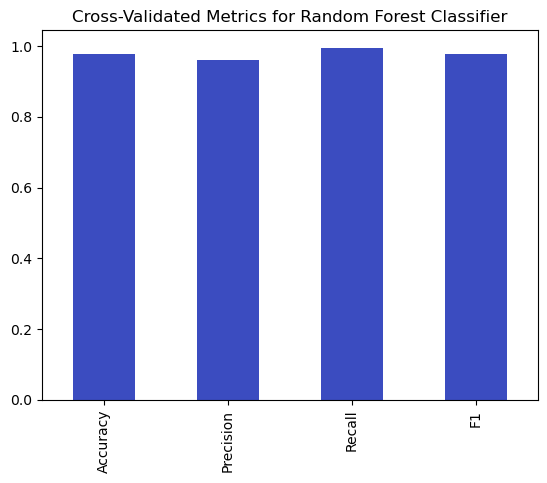

In [50]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics for Random Forest Classifier", legend=False, cmap="coolwarm");

In [51]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
rf = RandomForestClassifier(max_depth=None, 
                            min_samples_leaf=1, 
                            min_samples_split=2, 
                            n_estimators=200)

# Cross-validated accuracy score
cv_acc = cross_val_score(rf,
                         X, 
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # accuracy as scoring
cv_acc

array([0.31818182, 0.13636364, 0.15909091, 0.13636364, 0.09302326])

## Task 5: Model evaluation and visualization 
After training the model, 
- Evaluate it for issues like overfitting by comparing training and validation performance. 
- Visualize results with confusion matrices, ROC curves, and Precision-Recall curves to highlight model performance. 
- Use learning curves to detect overfitting or underfitting and feature importance plots to identify key predictors.


In [52]:
rf

RandomForestClassifier(n_estimators=200)

In [53]:
y_test.shape

(1333,)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Fit the model (if not already done)
#rf = rf_grid.best_estimator_  # Use the best model from GridSearchCV
rf.fit(X_train_resampled, y_train_resampled)

# Predictions on training set
y_train_pred = rf.predict(X_train_resampled)
y_train_proba = rf.predict_proba(X_train_resampled)[:, 1]

# Predictions on validation/test set
y_val_pred = rf.predict(X_test)
y_val_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate accuracy and AUC-ROC
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("AUC-ROC:", roc_auc_score(y_train_resampled, y_train_proba))

print("\nValidation Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_val_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_val_proba))

# Generate classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_test, y_val_pred))


Training Set Metrics:
Accuracy: 1.0
AUC-ROC: 1.0

Validation Set Metrics:
Accuracy: 0.9587396849212303
AUC-ROC: 0.9501022639114184

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1289
           1       0.41      0.55      0.47        44

    accuracy                           0.96      1333
   macro avg       0.70      0.76      0.72      1333
weighted avg       0.97      0.96      0.96      1333



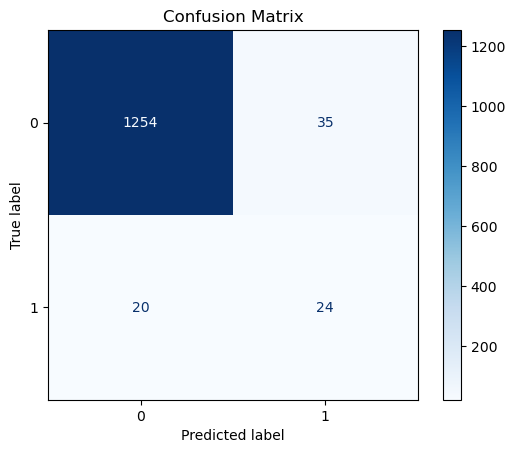

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


There are 34 occasions where our model predicted bankrupcy for companies that weren't bankrupt

And 17 occasions where our model predicted non-bankrupcy for originally recorded bankrupt companies

**Key Metrics from the Matrix** 
- True Negatives (TN): The model correctly predicted Class 0 (Non-Bankrupt) 1255 times when the actual class was 0 (Non-Bankrupt).
- False Positives (FP): The model incorrectly predicted Class 1 (Bankrupt) 34 times when the actual class was 0 (Non-bankrupt).
- False Negatives (FN): The model incorrectly predicted Class 0 (Non-Bankrupt) 17 times when the actual class was 1 (Bankrupt).
- True Positives (TP): The model correctly predicted Class 1 (Bankrupt) 27 times when the actual class was 1 (Bankrupt).


In [57]:
# Display confusion matrix
print(confusion_matrix(y_test, y_val_pred))

[[1254   35]
 [  20   24]]


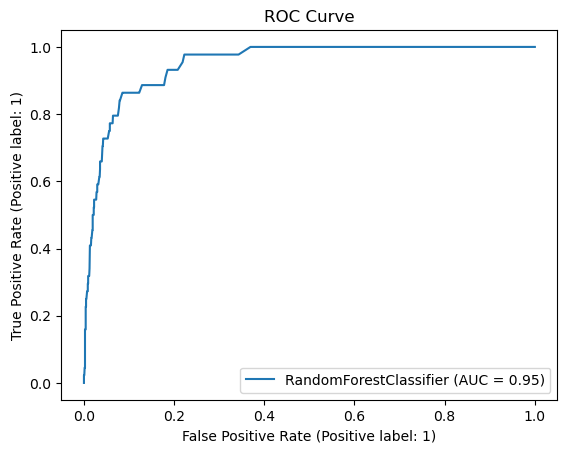

In [58]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve")
plt.show()


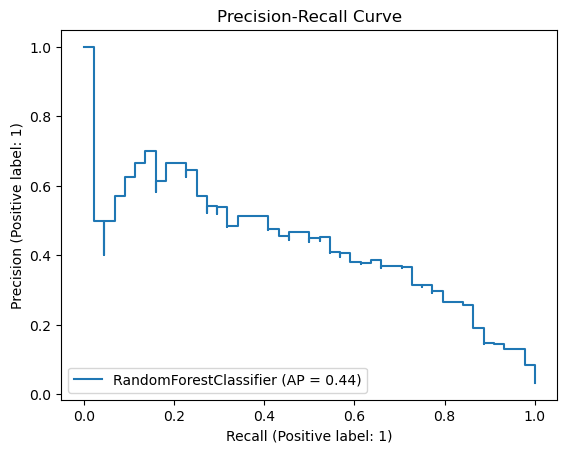

In [59]:
from sklearn.metrics import PrecisionRecallDisplay

# Plot Precision-Recall curve
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()


/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/mrsgracejidael/Anaconda/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/mrsgracejidael/Anaconda/anaconda3

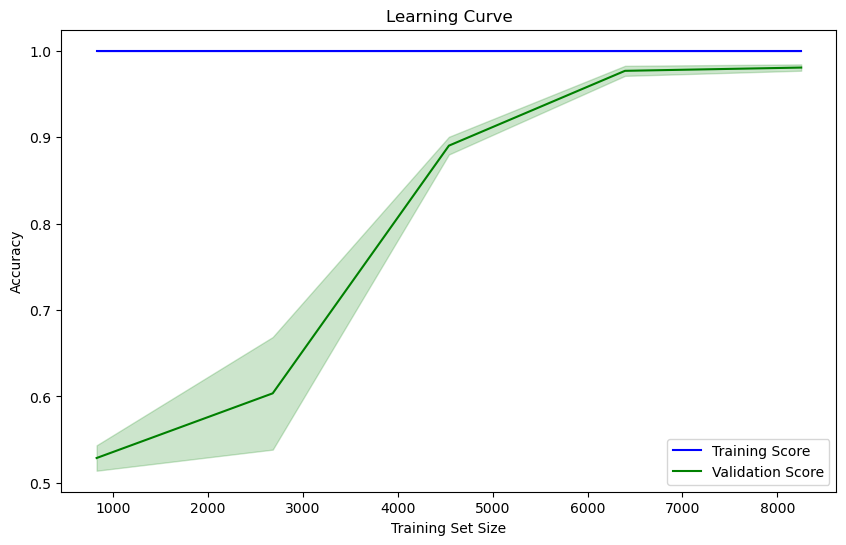

In [60]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate mean and standard deviation for train and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")

# Fill in standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

# Add labels and legend
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [61]:
feature_importances = rf.feature_importances_
important_features = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(important_features)

                                              Feature  Importance
85                         Net Income to Total Assets    0.060167
9                Continuous interest rate (after tax)    0.054550
7                         After-tax net Interest Rate    0.049686
67                  Retained Earnings to Total Assets    0.046306
2   ROA(B) before interest and depreciation after tax    0.039623
42              Net profit before tax/Paid-in capital    0.037535
18            Persistent EPS in the Last Four Seasons    0.034648
89                 Net Income to Stockholder's Equity    0.033748
35                         Total debt/Total net worth    0.032119
39                               Borrowing dependency    0.030048
37                                   Net worth/Assets    0.029894
22           Per Share Net profit before tax (Yuan ¥)    0.028600
68                         Total income/Total expense    0.025807
36                                       Debt ratio %    0.022796
33        

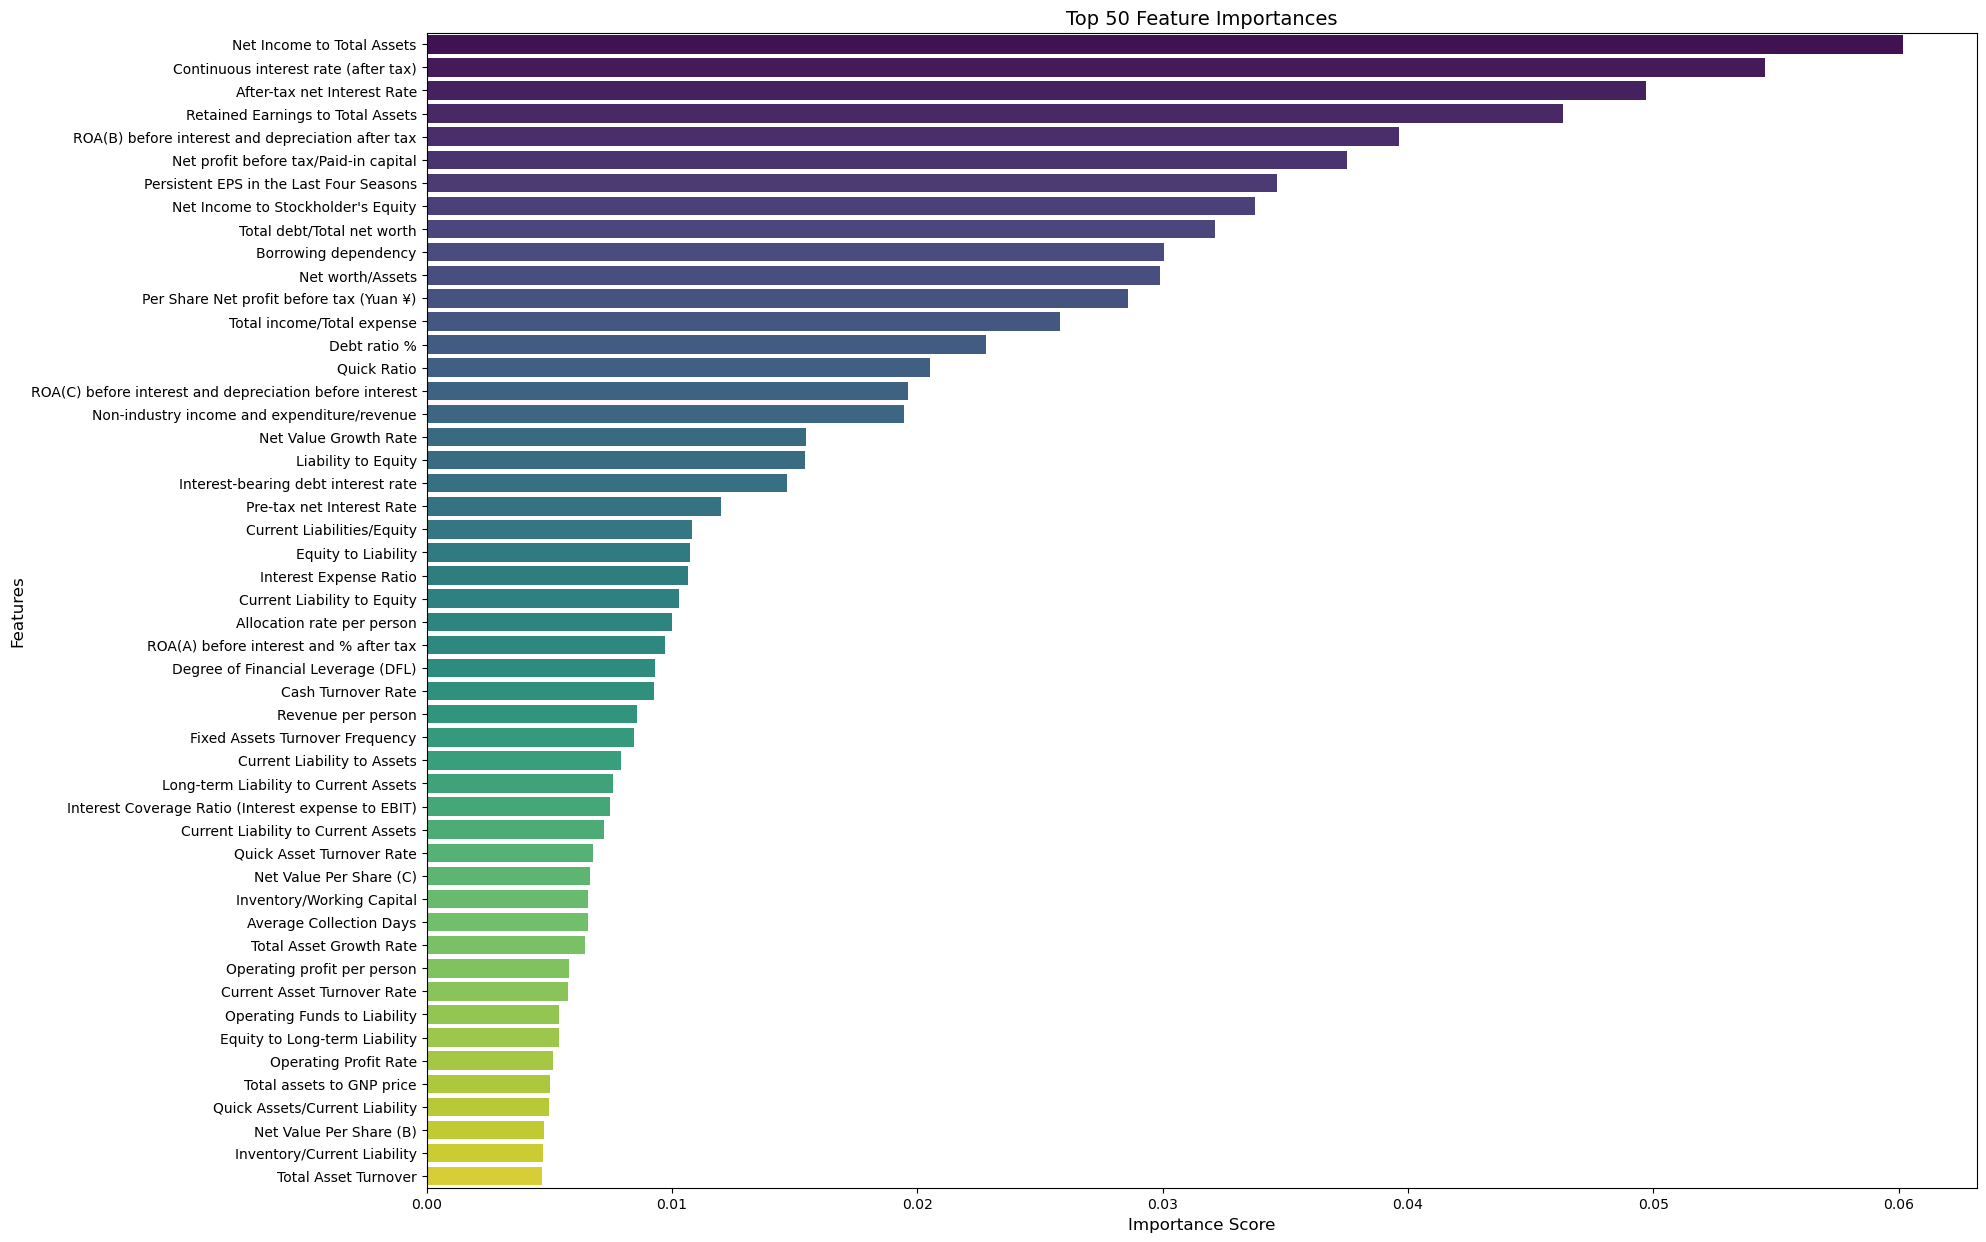

In [62]:

# Plot the top 50 important features
plt.figure(figsize=(20,15))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=important_features.head(50),  # Top 10 features
    palette='viridis'
)

# Add labels and title
plt.title("Top 50 Feature Importances", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.show()


In [66]:
# Convert correlated pairs to a DataFrame
feature_importances = pd.DataFrame(feature_importances)
feature_importances.head(20)


0
0   0.019625
1   0.009715
2   0.039623
3   0.003340
4   0.002856
5   0.005138
6   0.012020
7   0.049686
8   0.019449
9   0.054550
10  0.002879
11  0.004302
12  0.004574
13  0.014695
14  0.002818
15  0.004782
16  0.004119
17  0.006659
18  0.034648
19  0.003328

In [67]:
important_features

Feature  Importance
85                         Net Income to Total Assets    0.060167
9                Continuous interest rate (after tax)    0.054550
7                         After-tax net Interest Rate    0.049686
67                  Retained Earnings to Total Assets    0.046306
2   ROA(B) before interest and depreciation after tax    0.039623
42              Net profit before tax/Paid-in capital    0.037535
18            Persistent EPS in the Last Four Seasons    0.034648
89                 Net Income to Stockholder's Equity    0.033748
35                         Total debt/Total net worth    0.032119
39                               Borrowing dependency    0.030048
37                                   Net worth/Assets    0.029894
22           Per Share Net profit before tax (Yuan ¥)    0.028600
68                         Total income/Total expense    0.025807
36                                       Debt ratio %    0.022796
33                                        Quick Ratio    0.020519
0   ROA(C) before interest and depreciation before...    0.019625
8         Non-industry income and expenditure/revenue    0.019449
29                              Net Value Growth Rate    0.015470
90                                Liability to Equity    0.015423
13                Interest-bearing debt interest rate    0.014695
6                           Pre-tax net Interest Rate    0.012020
65                         Current Liabilities/Equity    0.010802
94                                Equity to Liability    0.010758
34                             Interest Expense Ratio    0.010642
77                        Current Liability to Equity    0.010285
52                         Allocation rate per person    0.010024
1              ROA(A) before interest and % after tax    0.009715
91                 Degree of Financial Leverage (DFL)    0.009314
73                                 Cash Turnover Rate    0.009286
50                                 Revenue per person    0.008583
48                    Fixed Assets Turnover Frequency    0.008442
59                        Current Liability to Assets    0.007913
66              Long-term Liability to Current Assets    0.007609
92  Interest Coverage Ratio (Interest expense to E...    0.007486
83                Current Liability to Current Assets    0.007252
71                          Quick Asset Turnover Rate    0.006789
17                            Net Value Per Share (C)    0.006659
61                          Inventory/Working Capital    0.006581
46                            Average Collection Days    0.006565
28                            Total Asset Growth Rate    0.006475
51                        Operating profit per person    0.005818
70                        Current Asset Turnover Rate    0.005780
60                       Operating Funds to Liability    0.005412
78                      Equity to Long-term Liability    0.005395
5                               Operating Profit Rate    0.005138
86                          Total assets to GNP price    0.005013
57                     Quick Assets/Current Liability    0.004973
15                            Net Value Per Share (B)    0.004782
62                        Inventory/Current Liability    0.004744
44                               Total Asset Turnover    0.004723
69                               Total expense/Assets    0.004655
12                                     Cash flow rate    0.004574
20                         Revenue Per Share (Yuan ¥)    0.004490
47                    Inventory Turnover Rate (times)    0.004428
40                   Contingent liabilities/Net worth    0.004387
32                                      Current Ratio    0.004330
11              Research and development expense rate    0.004302
26                     Regular Net Profit Growth Rate    0.004295
16                            Net Value Per Share (A)    0.004119
74                                 Cash Flow to Sales    0.003674
80                  

In [69]:
top_features = important_features[important_features["Importance"] >= 0.01]["Feature"]
X_train_reduced = X_train_resampled[top_features]
X_test_reduced = X_test[top_features]


In [70]:
X_test_reduced.columns

Index(['Net Income to Total Assets', 'Continuous interest rate (after tax)',
       'After-tax net Interest Rate', 'Retained Earnings to Total Assets',
       'ROA(B) before interest and depreciation after tax',
       'Net profit before tax/Paid-in capital',
       'Persistent EPS in the Last Four Seasons',
       'Net Income to Stockholder's Equity', 'Total debt/Total net worth',
       'Borrowing dependency', 'Net worth/Assets',
       'Per Share Net profit before tax (Yuan ¥)',
       'Total income/Total expense', 'Debt ratio %', 'Quick Ratio',
       'ROA(C) before interest and depreciation before interest',
       'Non-industry income and expenditure/revenue', 'Net Value Growth Rate',
       'Liability to Equity', 'Interest-bearing debt interest rate',
       'Pre-tax net Interest Rate', 'Current Liabilities/Equity',
       'Equity to Liability', 'Interest Expense Ratio',
       'Current Liability to Equity', 'Allocation rate per person'],
      dtype='object')

In [72]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Fit the model (if not already done)
#rf = rf_grid.best_estimator_  # Use the best model from GridSearchCV
rf.fit(X_train_reduced, y_train_resampled)

# Predictions on training set
y_train_pred = rf.predict(X_train_reduced)
y_train_proba = rf.predict_proba(X_train_reduced)[:, 1]

# Predictions on validation/test set
y_val_pred = rf.predict(X_test_reduced)
y_val_proba = rf.predict_proba(X_test_reduced)[:, 1]

# Evaluate accuracy and AUC-ROC
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("AUC-ROC:", roc_auc_score(y_train_resampled, y_train_proba))

print("\nValidation Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_val_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_val_proba))

# Generate classification report
print("\nValidation Set Classification Report:")
print(classification_report(y_test, y_val_pred))


Training Set Metrics:
Accuracy: 1.0
AUC-ROC: 1.0

Validation Set Metrics:
Accuracy: 0.9482370592648162
AUC-ROC: 0.9424941815360744

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1289
           1       0.35      0.64      0.45        44

    accuracy                           0.95      1333
   macro avg       0.67      0.80      0.71      1333
weighted avg       0.97      0.95      0.96      1333



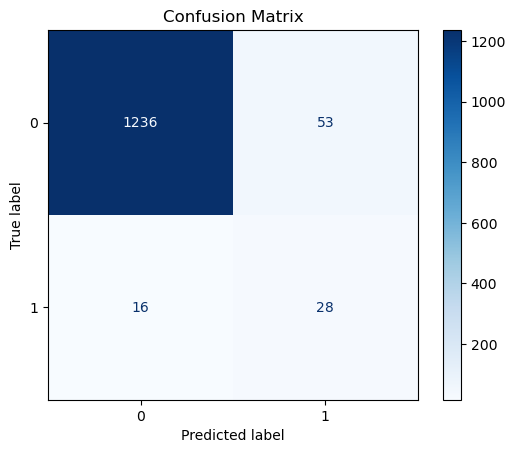

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_reduced, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [74]:
# Display confusion matrix
print(confusion_matrix(y_test, y_val_pred))

[[1236   53]
 [  16   28]]


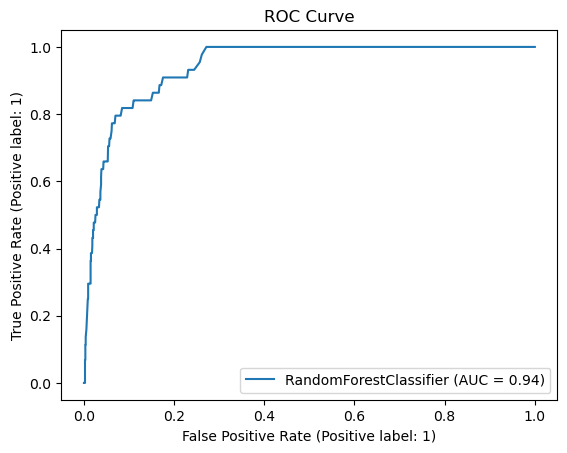

In [76]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve
RocCurveDisplay.from_estimator(rf, X_test_reduced, y_test)
plt.title("ROC Curve")
plt.show()


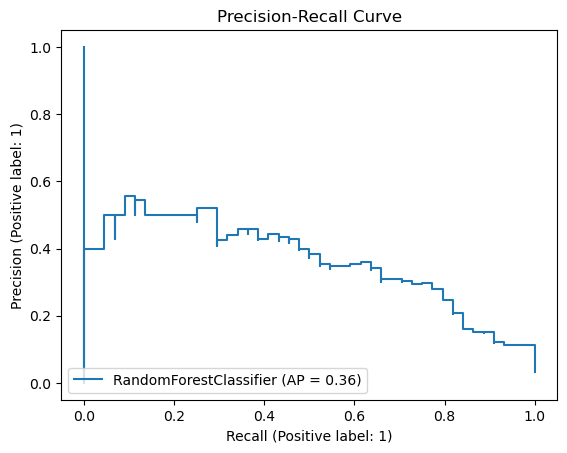

In [77]:
from sklearn.metrics import PrecisionRecallDisplay

# Plot Precision-Recall curve
PrecisionRecallDisplay.from_estimator(rf, X_test_reduced, y_test)
plt.title("Precision-Recall Curve")
plt.show()


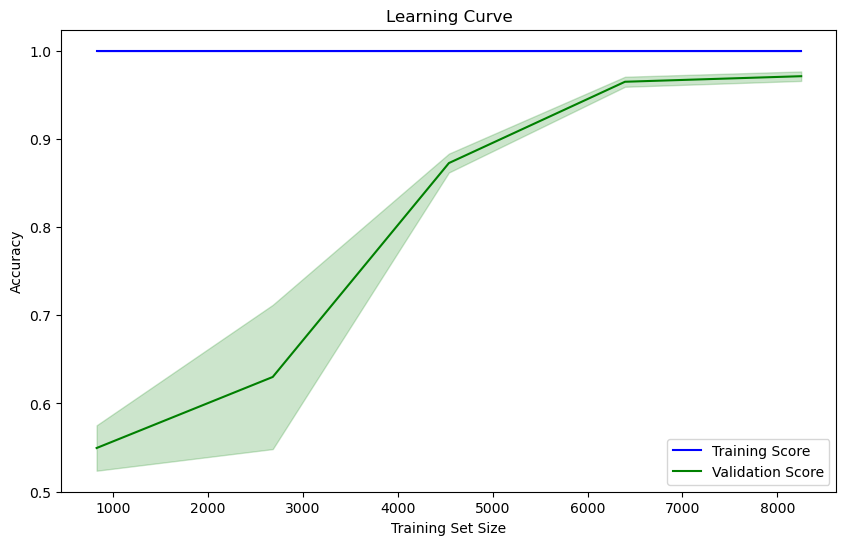

In [78]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train_reduced, y_train_resampled, cv=5, scoring="accuracy", n_jobs=1
)

# Calculate mean and standard deviation for train and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")

# Fill in standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

# Add labels and legend
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
